# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

## Hypothestis Generation
Hypotheses for analyzing the BigMart Outlet Sales dataset:
1. Location of the store affects sales.
2. Product placement affects sales.
3. Store size affects the sales.


## Feature Description

1. Item_Identifier: A unique product ID assigned to each item in the store.
2. Item_Weight: The weight of the product in grams.
3. Item_Fat_Content: Whether the product is labeled as "Low Fat" or "Regular".
4. Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product.
5. Item_Type: The category to which the product belongs (e.g., dairy, meats, household, etc.).
6. Item_MRP: The maximum retail price of the product.
7. Outlet_Identifier: A unique store ID assigned to each outlet.
8. Outlet_Establishment_Year: The year in which the outlet was established.
9. Outlet_Size: The size of the outlet in terms of ground area covered.
10. Outlet_Location_Type: The type of city in which the outlet is located (Tier 1, 2, or 3).
11. Outlet_Type: Whether the outlet is a grocery store or a supermarket.
12. Item_Outlet_Sales: The sales of the product in the particular outlet.

### Importing Libraries that are useful for data manipulation and visualization etc

In [304]:
# For data reading | manipulation :
import pandas as pd 

#For handling spatial data
import geopandas as gpd

#import psycopg2 library to connect database :
import psycopg2

# For reading the array :
import numpy as np

# For visualize the data and plotting  :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To ignore warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Train-test split :
from sklearn.model_selection import train_test_split

#import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression,Lasso, Ridge

import xgboost as xgb

#import RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# To check the accuracy of model :
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# To scaled the data :
from sklearn.preprocessing import StandardScaler



### Loading Data(Train data, Test data)

In [305]:
#Loading training data
train=pd.read_csv("Train.csv")

#Loading test data
test=pd.read_csv("Test.csv")

#Display the structure and few records of the dataset
train.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [306]:
train_data=train.copy()

### Exploratory Data Analysis

In [307]:
#Print first 5 records of dataset
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [308]:
#Display the dimensions of the Dadaset (rows, columns).

train_data.shape

(8523, 12)

In [309]:
#Display summary of the DataFrame, including the number of non-null values and data types of each column.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [310]:
#Number of missing Values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [311]:
#Display descriptive statistics for the numerical columns of the Dataset, 
#including count, mean, standard deviation, minimum, maximum, and quartiles.
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Data preparation and cleaning

In [312]:
#Counts of unique values in each  categorcal column of datset.
cat_variable=train_data[["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]]

for column in cat_variable:
    unique_values = cat_variable[column].unique()
    print("-------------------------------------------------------------------------")
    print(f"{column}: {unique_values}")

-------------------------------------------------------------------------
Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
-------------------------------------------------------------------------
Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
-------------------------------------------------------------------------
Outlet_Size: ['Medium' nan 'High' 'Small']
-------------------------------------------------------------------------
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
-------------------------------------------------------------------------
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


The attribute "Item_Fat_Content" contains two different values that are Regular and Low Fat but these two values are in differet format. We have bring these values in same format.

In [313]:
#Replacing the values of "Item_Fat_Content" attribute to bring them in same format
train_data["Item_Fat_Content" ]=train_data["Item_Fat_Content" ].replace("reg","Regular")

train_data["Item_Fat_Content" ]=train_data["Item_Fat_Content" ].replace(["LF","low fat"],"Low Fat")

#Checking the Output of the unique values in the Item_Fat_Content column
train_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Missing Value Handling

In [314]:
# Checking for the missing values and its precentage
values = train_data.isnull().sum()
percentage = 100*train_data.isnull().sum()/len(train_data)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('OrRd')

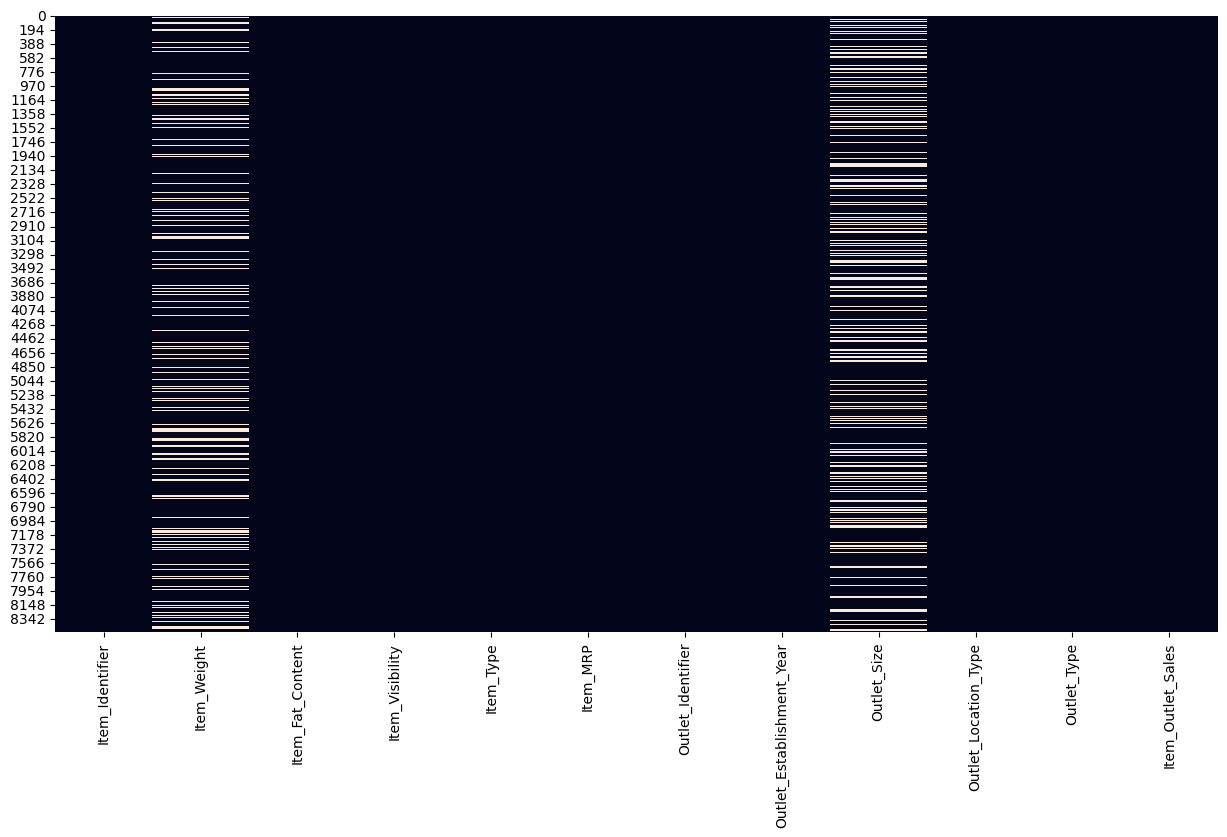

In [315]:
# Check the missing values with heatmap :

sns.heatmap(train_data.isnull(), cbar=False)
plt.show()

### Interpretation 

* From the above heatmep, we can say that missing values are present in the dataset. 
* We will impute the values of attributes "Item_Weight" by mean and "Outlet_Size" by most frequent value(i.e Mode)

In [316]:
#Replacing null values by mean
train_data["Item_Weight"]=train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean())

In [317]:
#Replcing null value of 'train_data1' by mode value
train_data["Outlet_Size"]=train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode()[0])

In [318]:
# After inputing missing values by day checking for the missing values :
values = train_data.isnull().sum()
percentage = 100*train_data.isnull().sum()/len(train_data)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('OrRd')

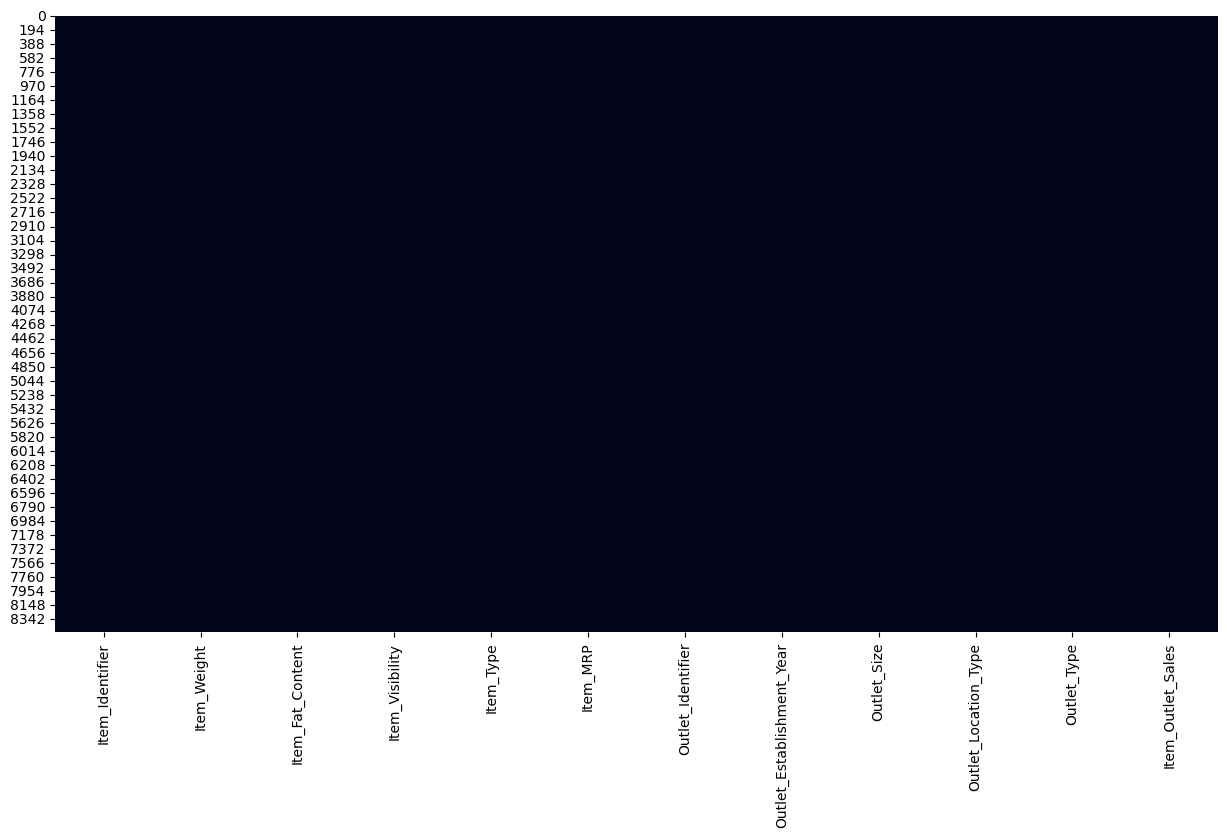

In [319]:
sns.heatmap(train_data.isnull(), cbar=False)
plt.show()

### Outlier Handling

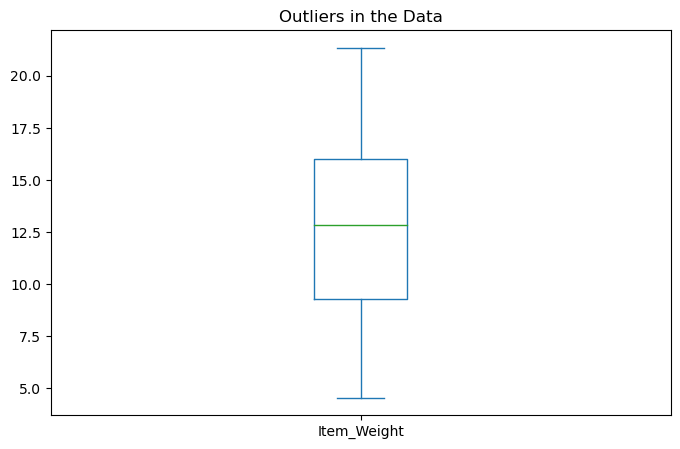

<Figure size 1500x800 with 0 Axes>

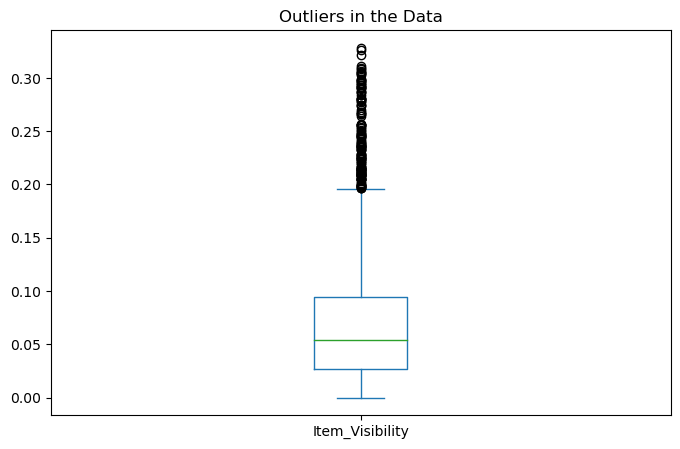

<Figure size 1500x800 with 0 Axes>

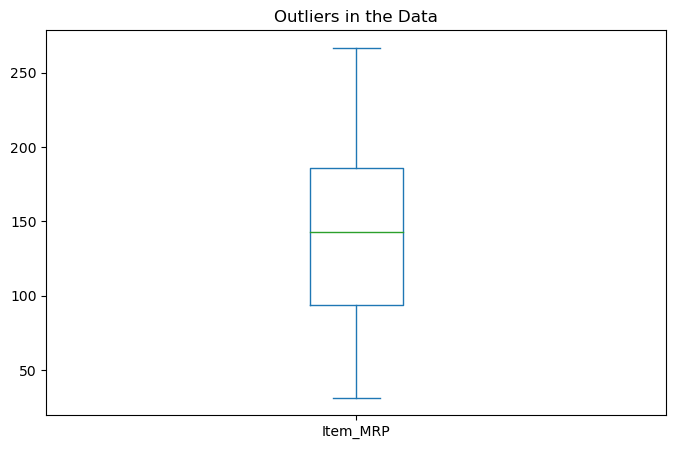

<Figure size 1500x800 with 0 Axes>

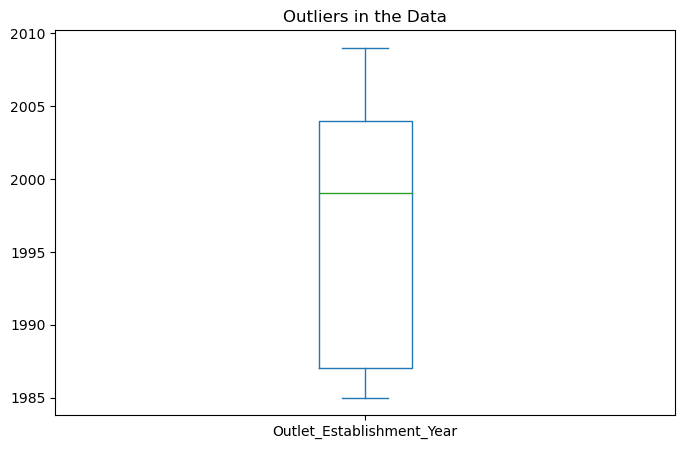

<Figure size 1500x800 with 0 Axes>

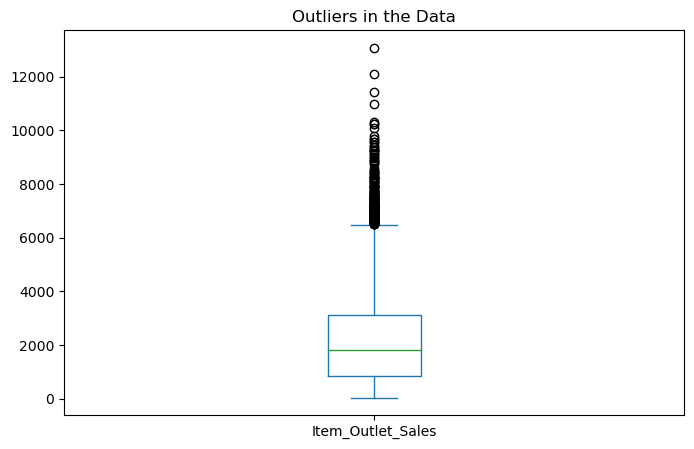

<Figure size 1500x800 with 0 Axes>

In [320]:
# Checking for outliers :
num_var=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

for col in num_var:
    plt.figure(figsize=(8,5))
    train_data[col].plot(kind='box')
    #sns.boxplot(train_data[col])
    plt.title("Outliers in the Data")
    plt.show()
    plt.savefig('Outliers.png', dpi=300, bbox_inches='tight')

The above box plot shows that outliers are present in the dataset(i.e 'Item_Outlet_Sales' and 'Item_Visibility' contain outliers)

### Removing Outlier

In [321]:
# IQR based outlier filtering
#for attribute Item_Visibility
percentile25_IV=train_data['Item_Visibility'].quantile(0.25)
percentile75_IV=train_data['Item_Visibility'].quantile(0.75)

#inter quartile range for Item_Visibility
IQR1=percentile75_IV-percentile25_IV

lower_lim_IV=percentile25_IV-1.5*IQR1
upper_lim_IV=percentile75_IV+1.5*IQR1

new_train=train_data.copy()

new_train['Item_Visibility']=np.where(
    new_train['Item_Visibility']>upper_lim_IV,
    upper_lim_IV,
    np.where(
        new_train['Item_Visibility']<lower_lim_IV,
        lower_lim_IV,
        new_train['Item_Visibility']
    )
)

#for attribute Item_Outlet_Sales
percentile25_IOS=train_data['Item_Outlet_Sales'].quantile(0.25)
percentile75_IOS=train_data['Item_Outlet_Sales'].quantile(0.75)

#inter quartile range for Item_Outlet_Sales
IQR2=percentile75_IOS-percentile25_IOS

lower_lim_IOS=percentile25_IOS-1.5*IQR2
upper_lim_IOS=percentile75_IOS+1.5*IQR2

new_train['Item_Outlet_Sales']=np.where(
    new_train['Item_Outlet_Sales']>upper_lim_IOS,
    upper_lim_IOS,
    np.where(
        new_train['Item_Outlet_Sales']<lower_lim_IOS,
        lower_lim_IOS,
        new_train['Item_Outlet_Sales']
    )
)


In [322]:
new_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

<AxesSubplot:>

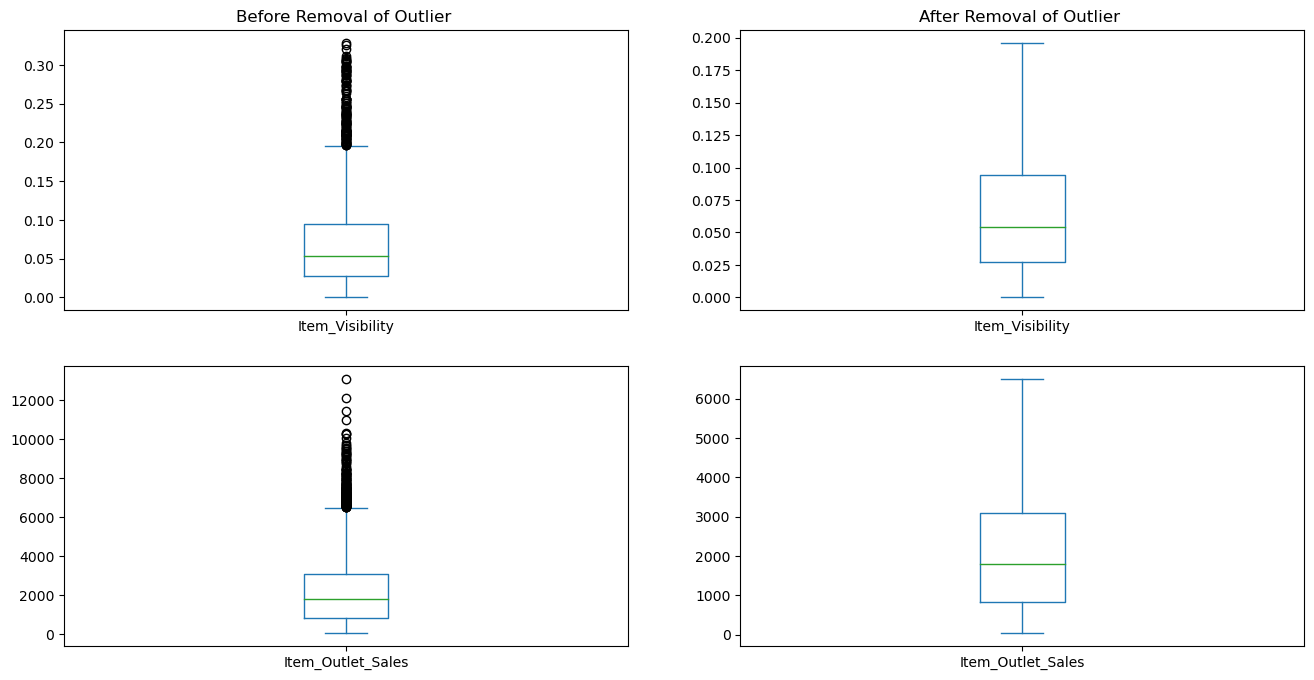

In [323]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.title("Before Removal of Outlier ")
train_data['Item_Visibility'].plot(kind='box')

plt.subplot(2,2,2)
plt.title("After Removal of Outlier ")
new_train['Item_Visibility'].plot(kind='box')

plt.subplot(2,2,3)
train_data['Item_Outlet_Sales'].plot(kind='box')

plt.subplot(2,2,4)
new_train['Item_Outlet_Sales'].plot(kind='box')

## Skewness and Kurtosis of numerical attributes

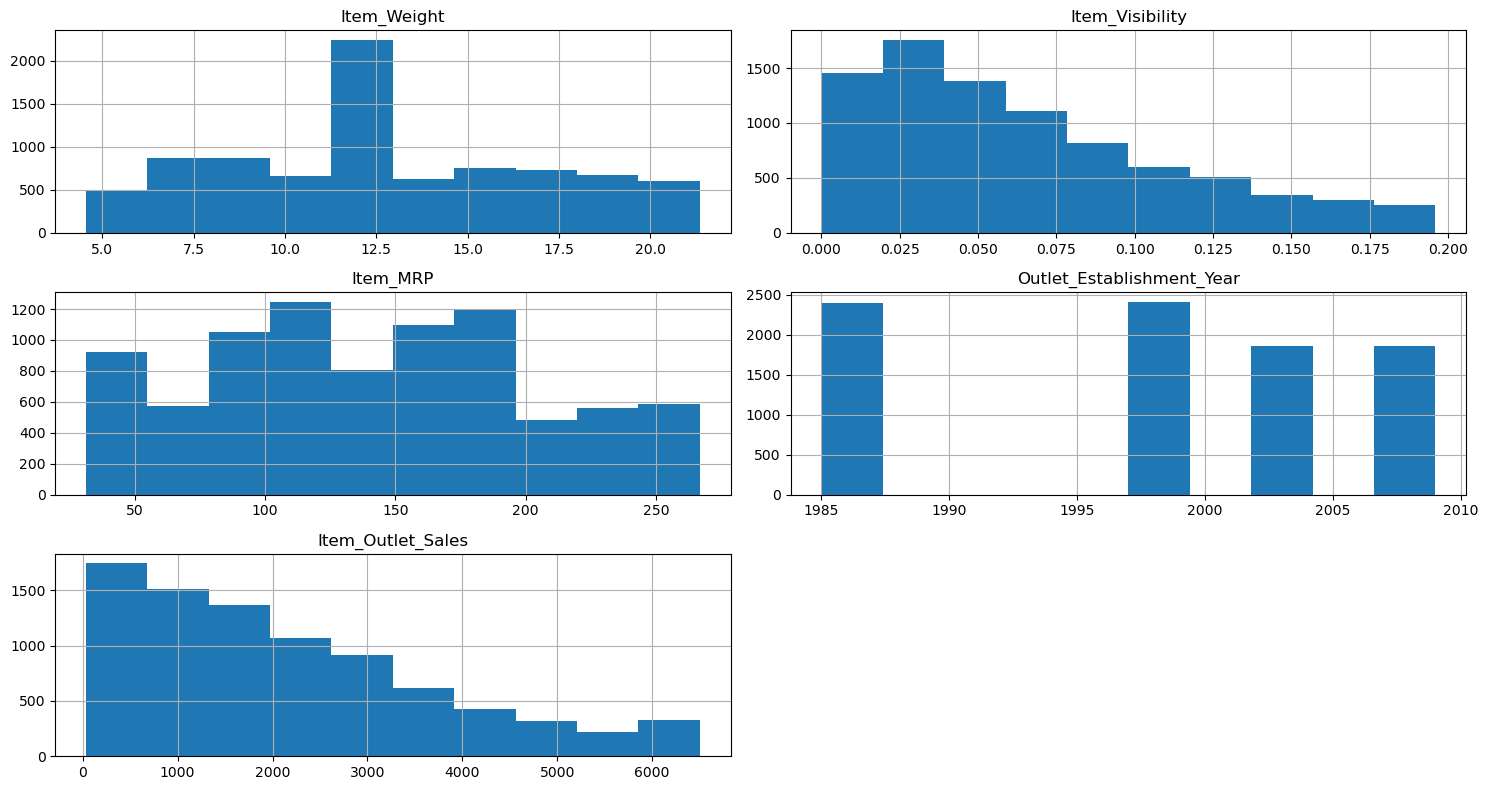

Skewness :
 Item_Weight                  0.090561
Item_Visibility              0.813980
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            0.874606
dtype: float64
---------------------------------
Kurtosis :
 Item_Weight                 -0.860294
Item_Visibility             -0.088911
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            0.070035
dtype: float64


<Figure size 1500x800 with 0 Axes>

In [324]:
# Check the distribution of the all numerical columns and print skewness of the data :

new_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].hist()
plt.tight_layout()
plt.title("Distribution of Data")
plt.show()
plt.savefig('Distribution of data.png')
# Print the skewness of the data :
print('Skewness :\n', new_train[['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].skew())
print("---------------------------------")
print('Kurtosis :\n', new_train[['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].kurt())

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

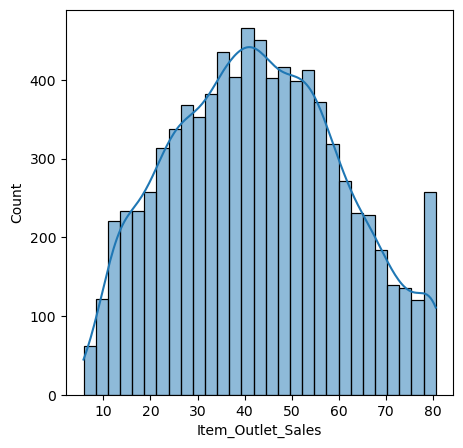

In [327]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)
new_train['Item_Outlet_Sales'] = new_train['Item_Outlet_Sales'].map(sqrt_transformation)

new_train['Item_Visibility'] = new_train['Item_Visibility'].map(sqrt_transformation)
# After fixing skewness

plt.figure(figsize = (5,5))
sns.histplot(data = new_train, x = 'Item_Outlet_Sales', kde = True)



<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

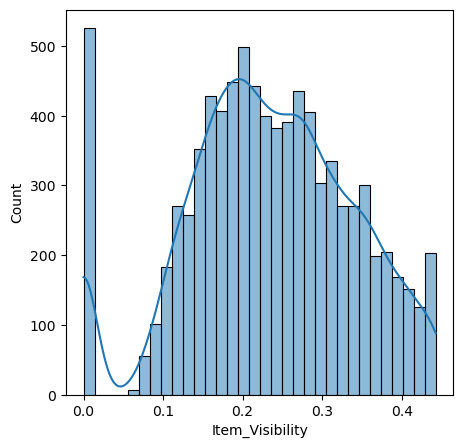

In [328]:
plt.figure(figsize = (5,5))
sns.histplot(data = new_train, x = 'Item_Visibility', kde = True)

## Univariate Analysis 
### Categorical Variable


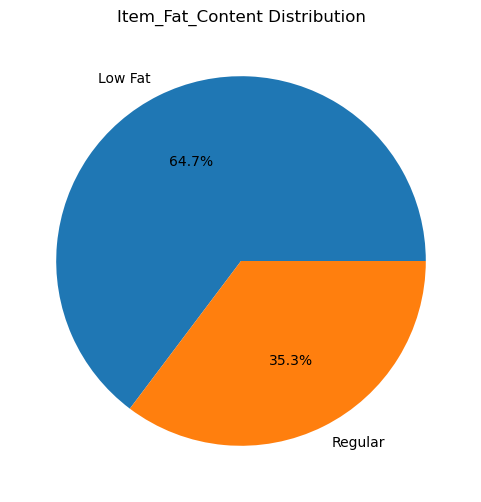

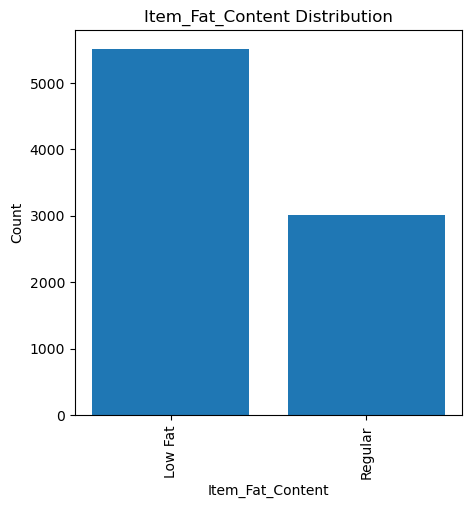

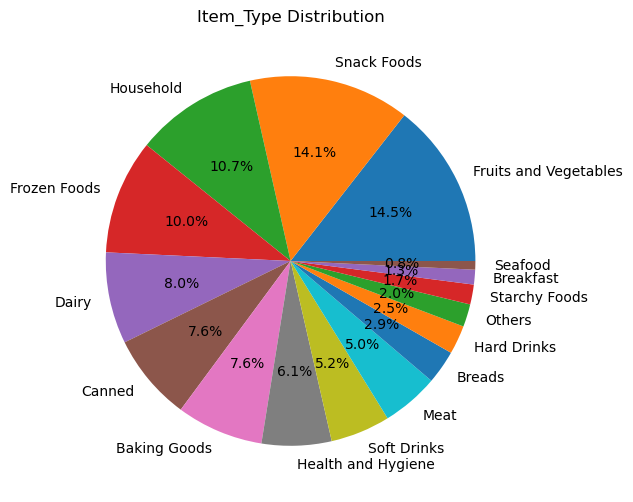

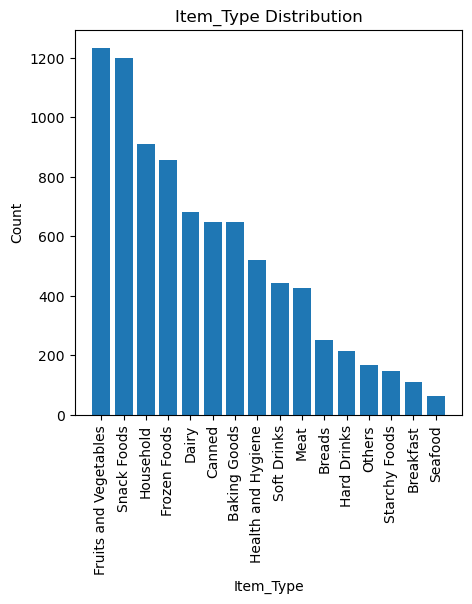

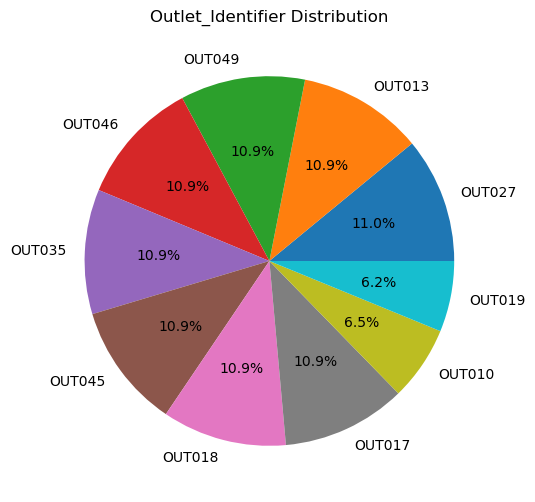

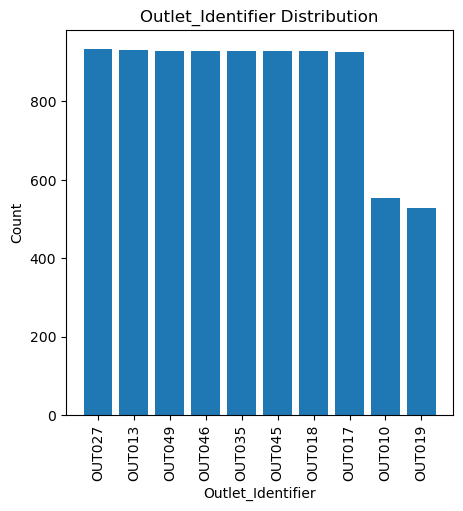

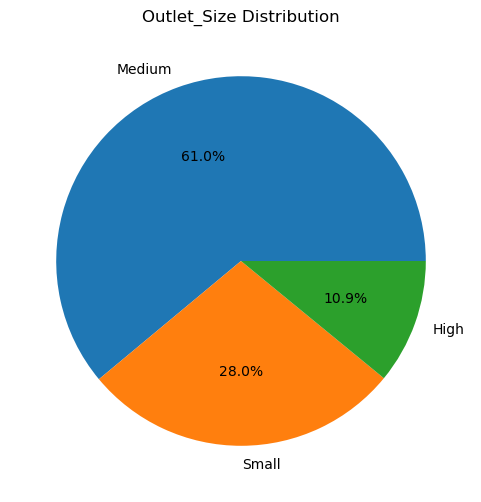

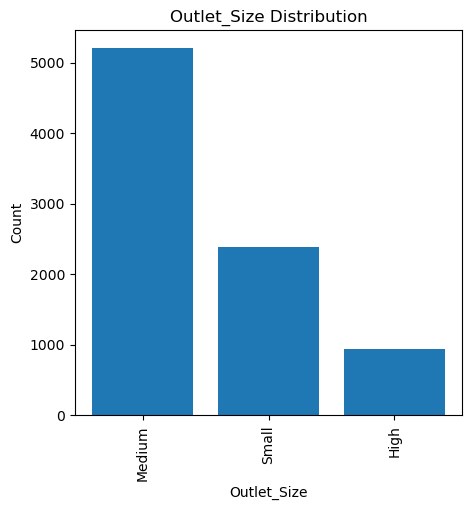

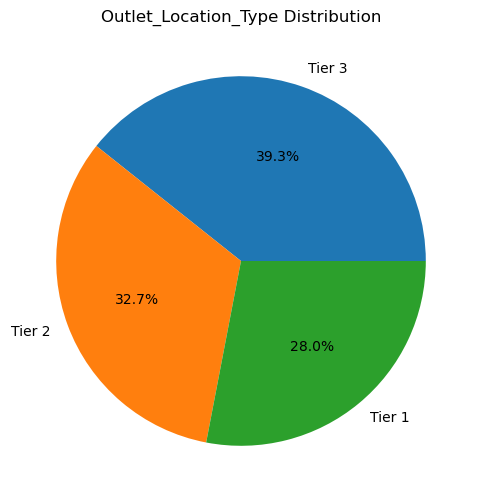

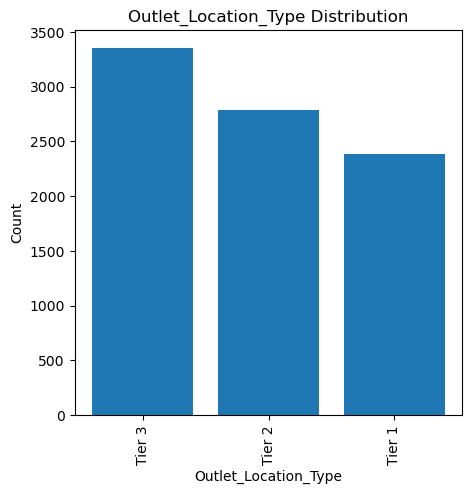

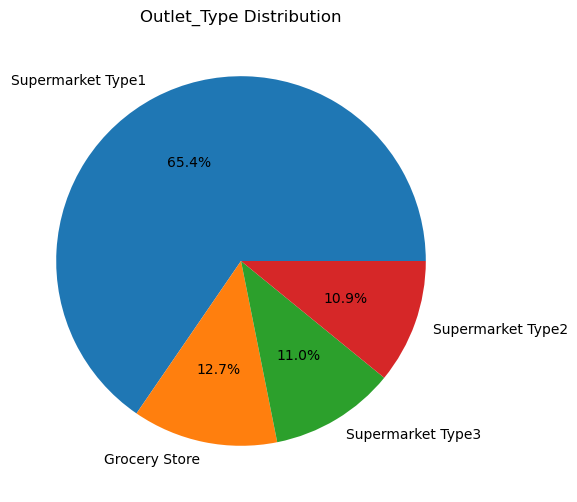

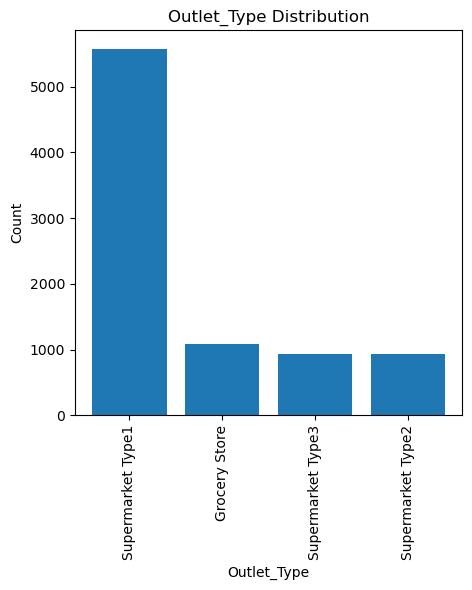

In [329]:
categoric_train= ["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

# iterate through each categorical attribute
for attr in categoric_train:
    # calculate value counts
    counts = new_train[attr].value_counts()
    
    # create pie chart
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(attr + ' Distribution')
    plt.show()
    
    # create barplot
    plt.figure(figsize=(5,5))
    plt.bar(counts.index, counts)
    plt.title(attr + ' Distribution')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

### Numerical Variable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The impact of  Item_Weight on Item_Outlet_Sales


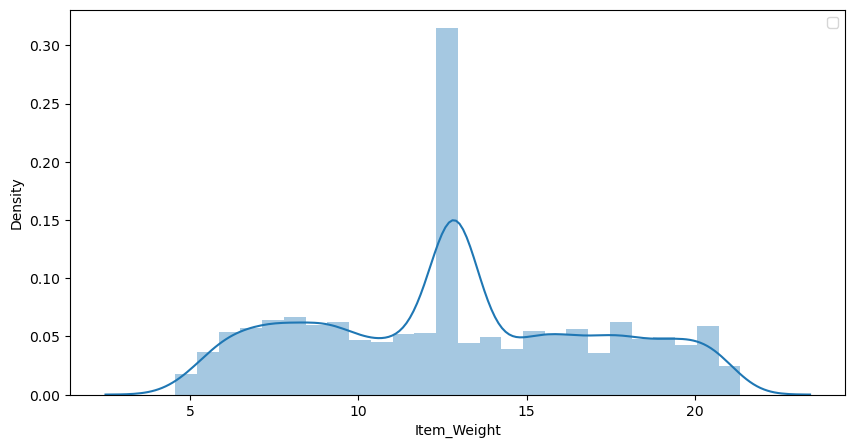

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The impact of  Item_Visibility on Item_Outlet_Sales


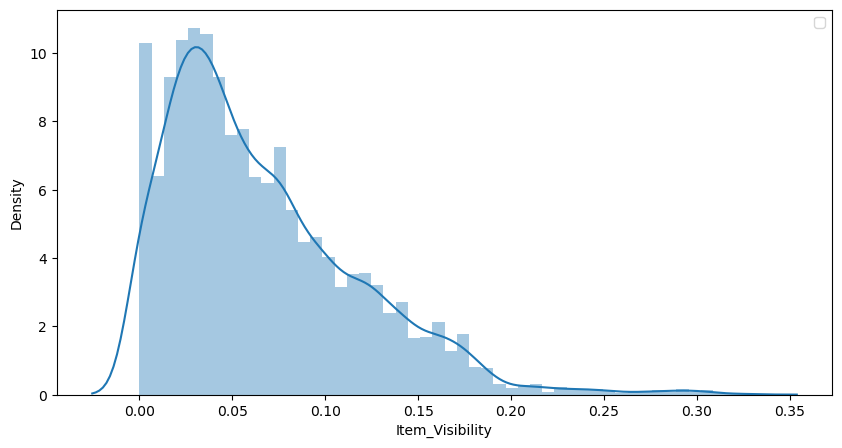

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The impact of  Item_MRP on Item_Outlet_Sales


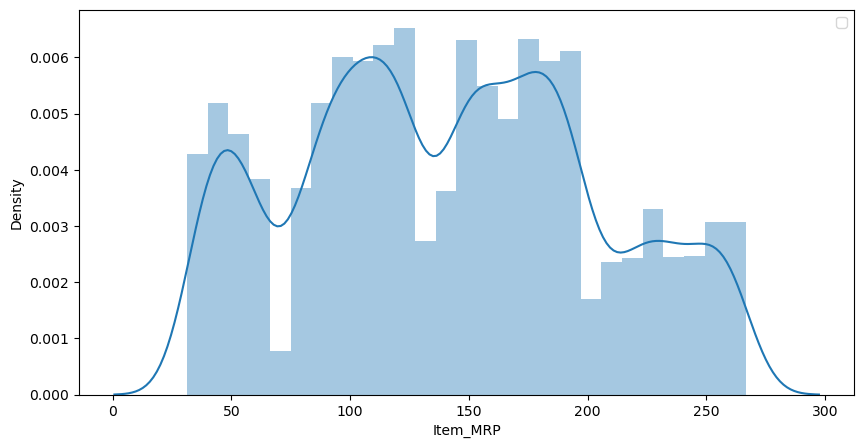

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The impact of  Outlet_Establishment_Year on Item_Outlet_Sales


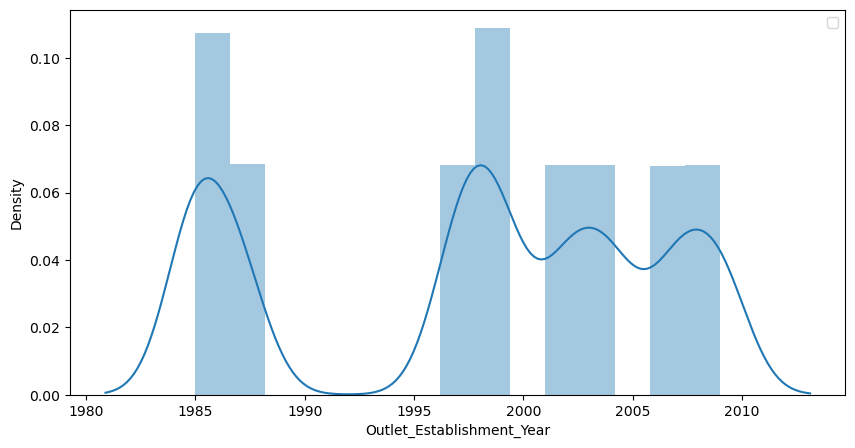

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The impact of  Item_Outlet_Sales on Item_Outlet_Sales


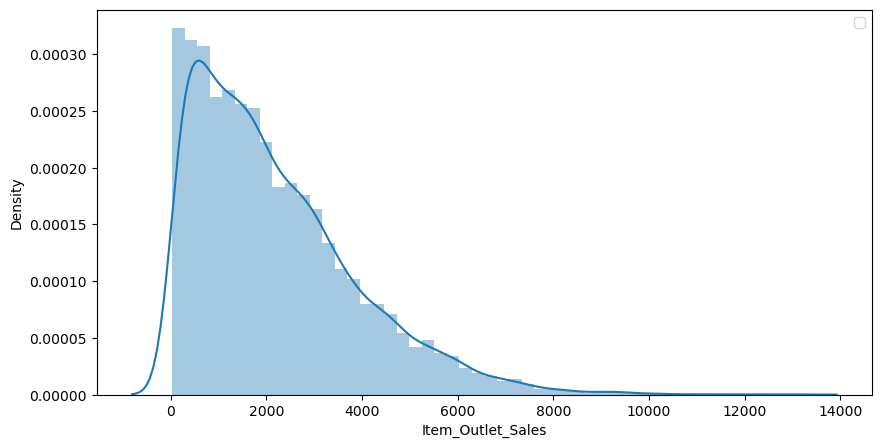

In [330]:
numerical_train=new_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
# Check the effect of all variable on the target varible:

for i in numerical_train:
    print('The impact of ', i, 'on Item_Outlet_Sales')
    plt.figure(figsize=(10,5))
    sns.distplot( train_data[i])
    plt.legend()
    plt.show()

## Bivariate Analysis

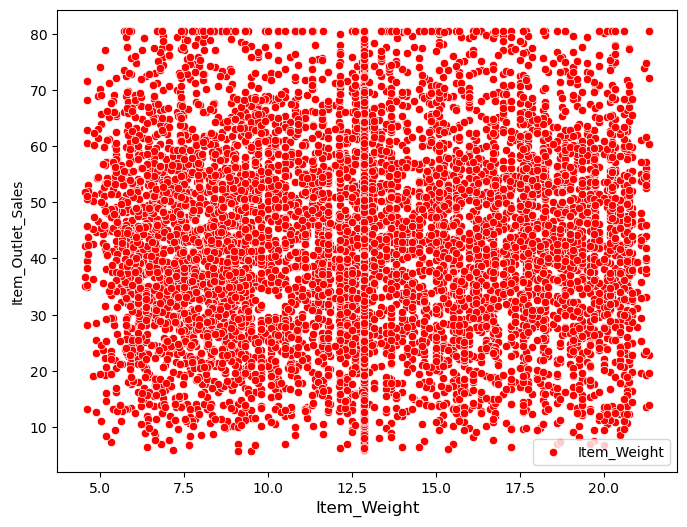

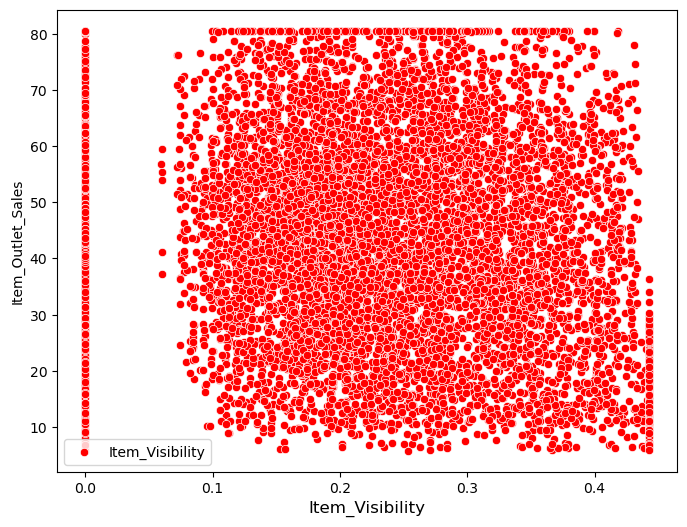

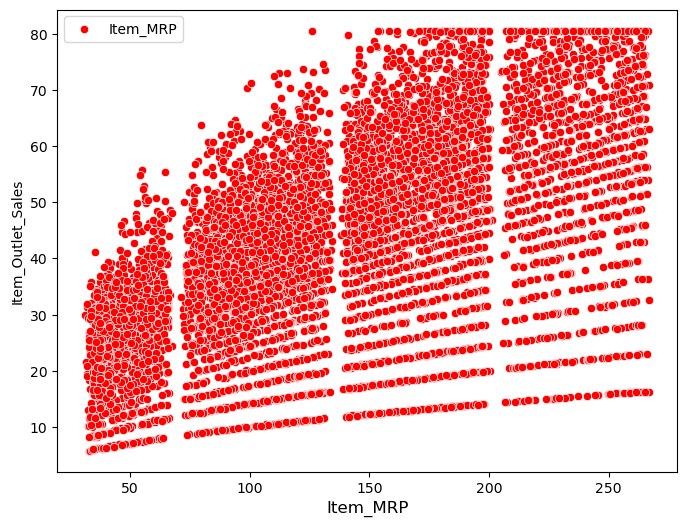

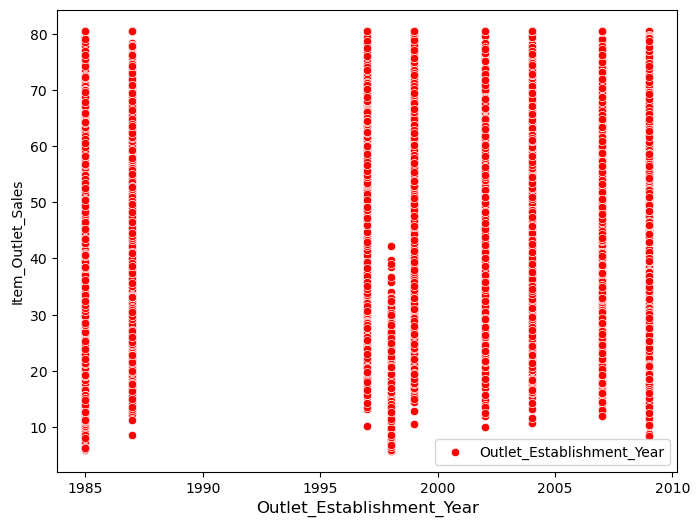

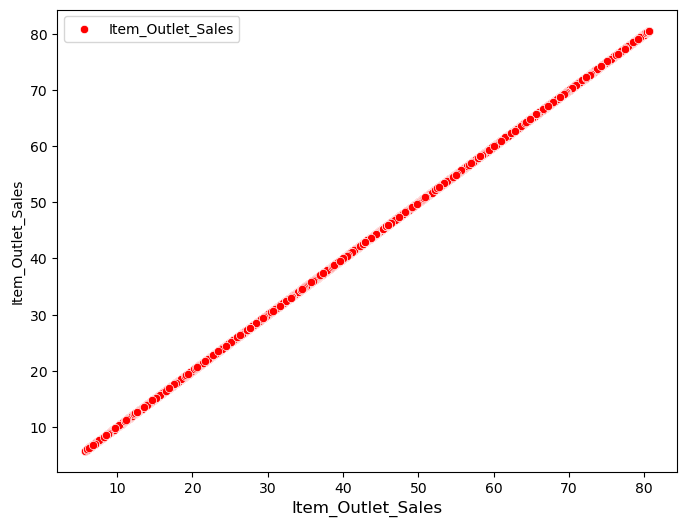

In [331]:
for i in numerical_train:
    plt.figure(figsize =(8,6))
    sns.scatterplot(x = i, y ='Item_Outlet_Sales', data = new_train,marker="o",sizes=200,color="r",label=i)
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Item_Outlet_Sales")

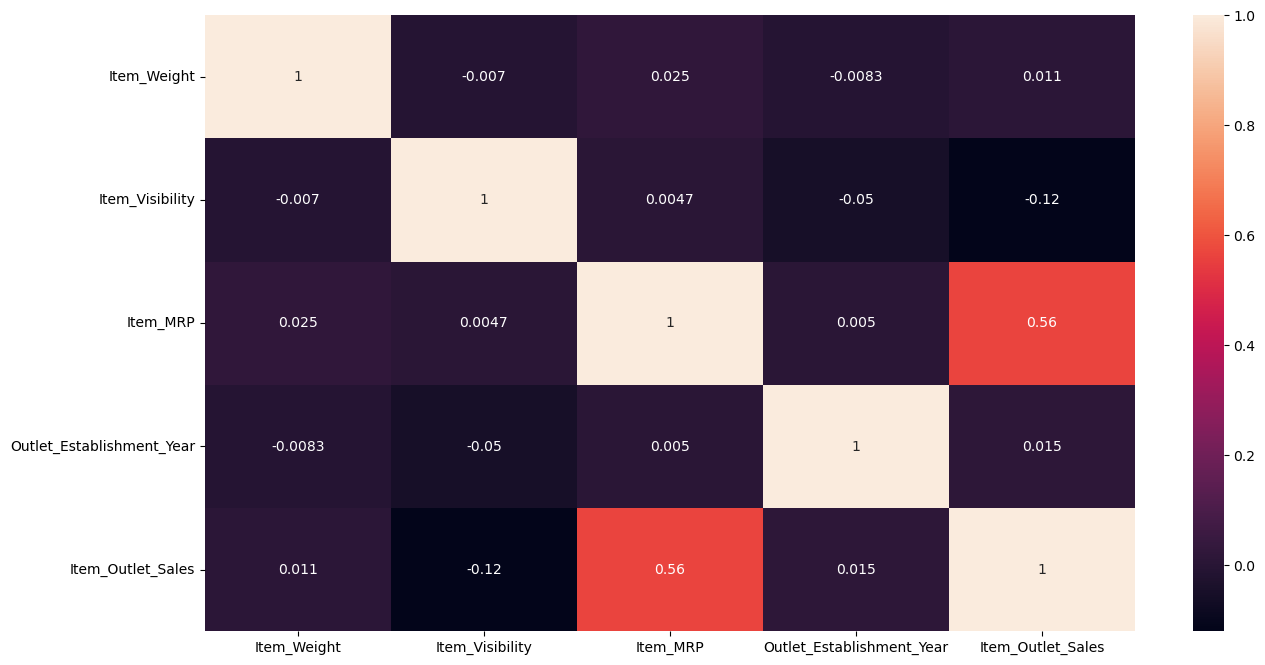

In [332]:
plt.figure(figsize=(15,8))

#Correlation plot
sns.heatmap(numerical_train.corr(), annot=True)
plt.show()


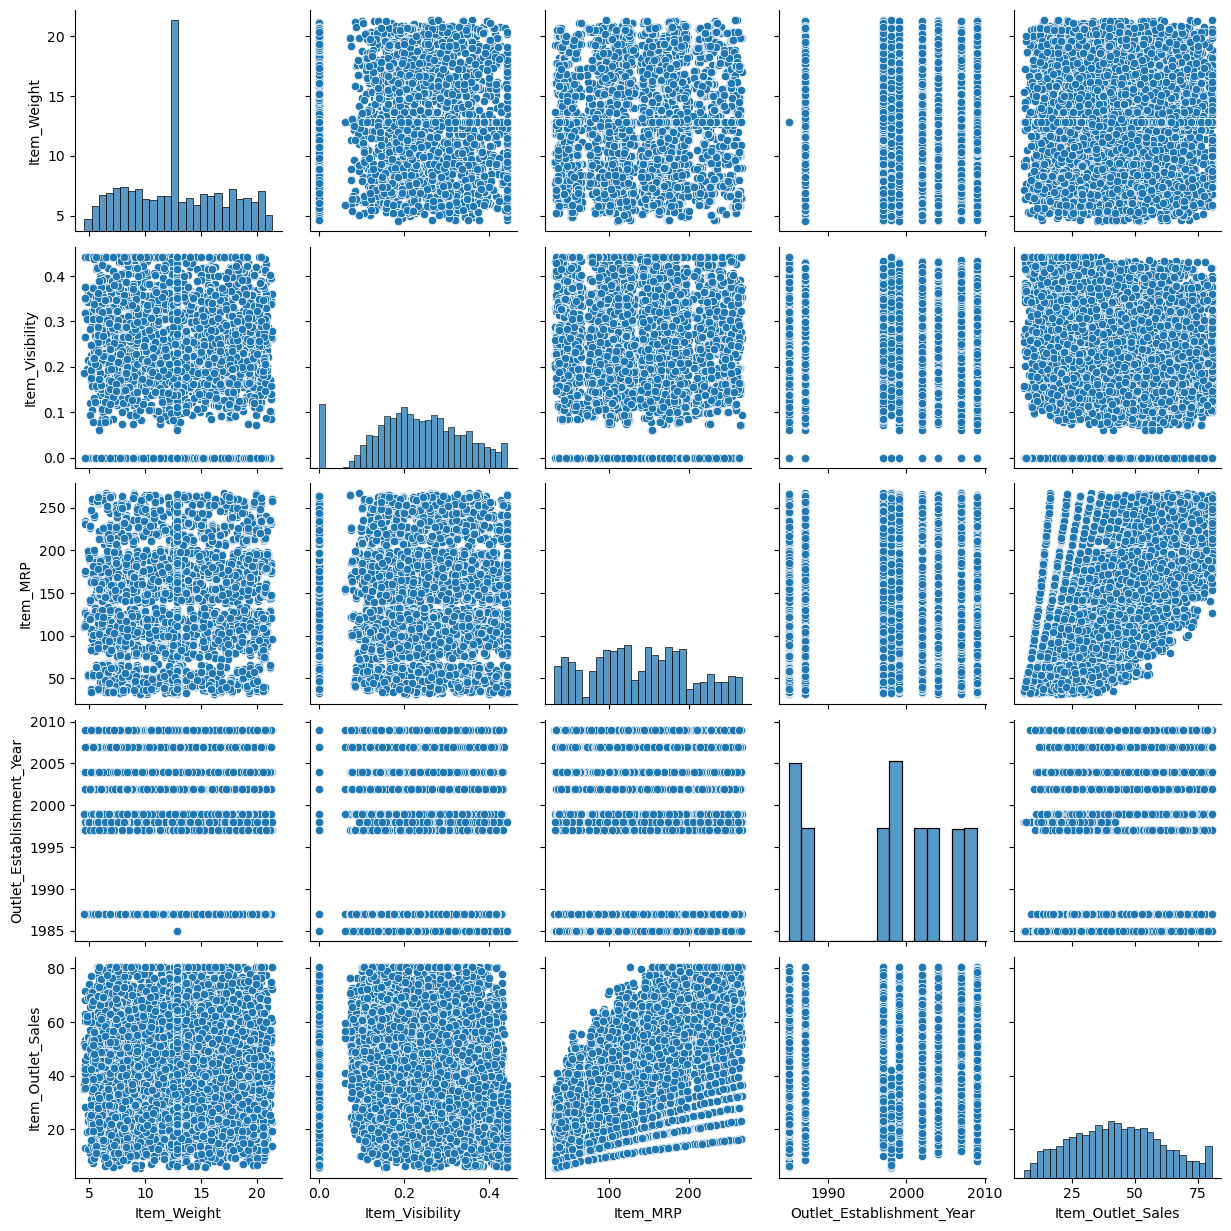

In [333]:
#pairplot for numerical variable
sns.pairplot(numerical_train)

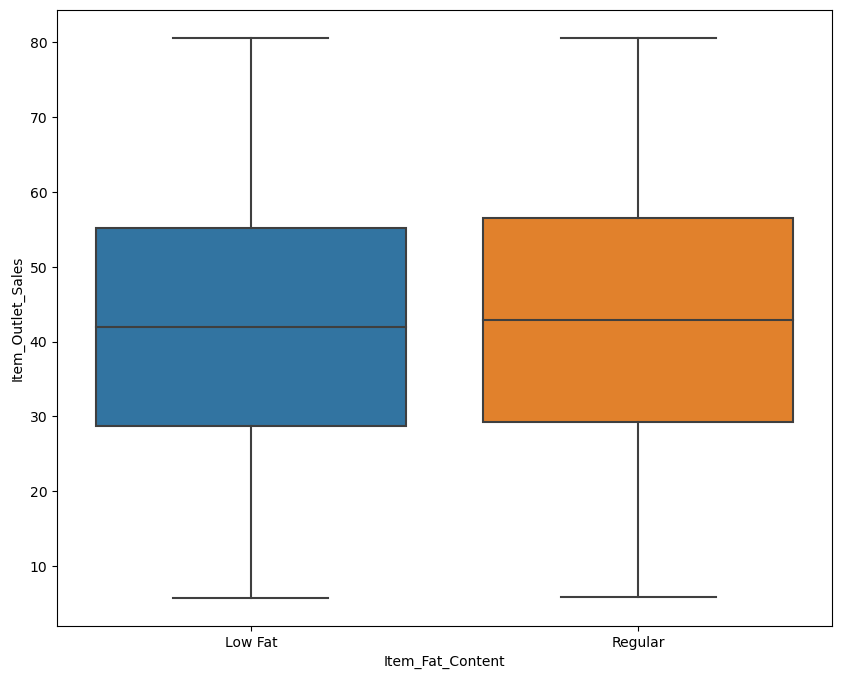

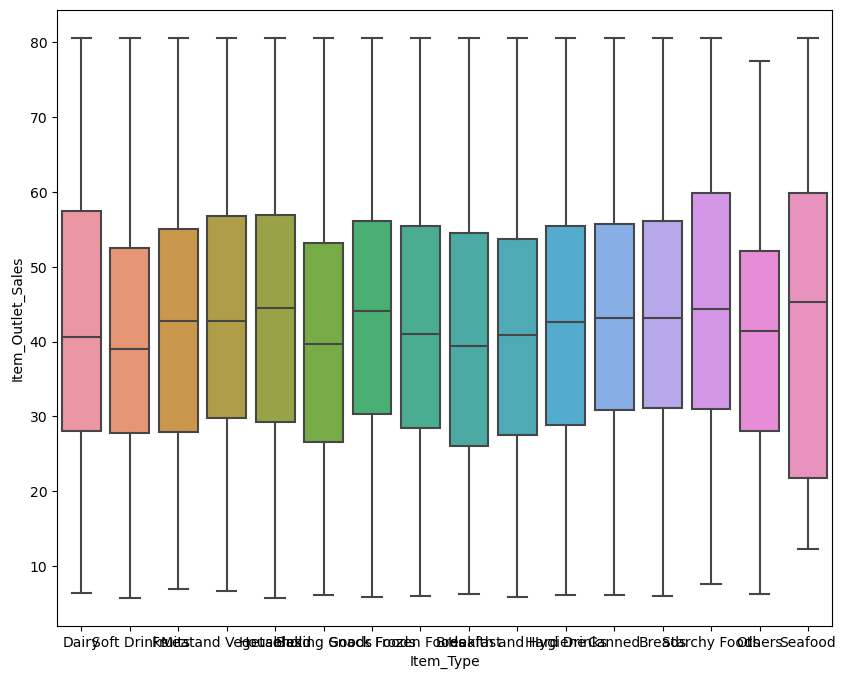

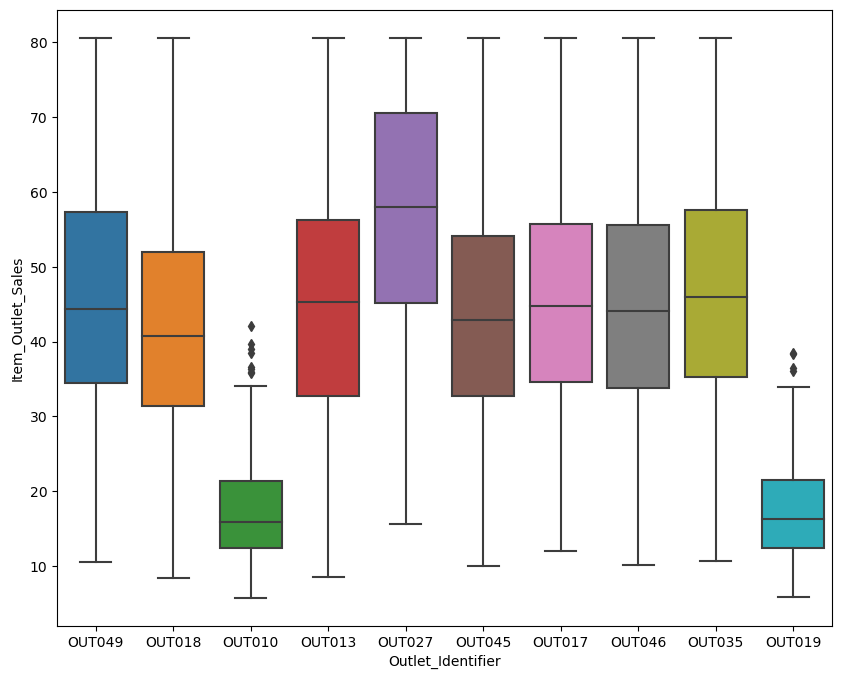

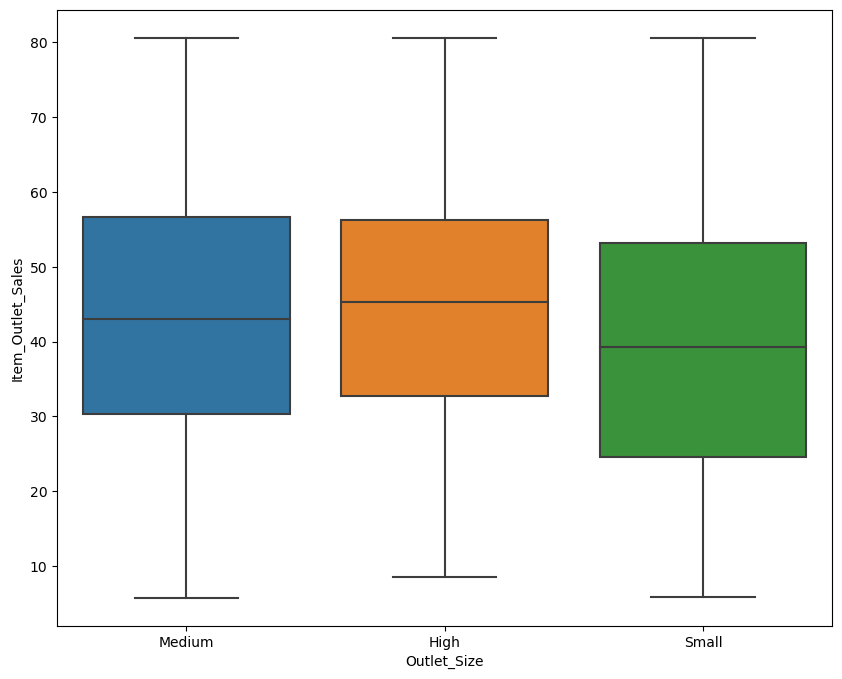

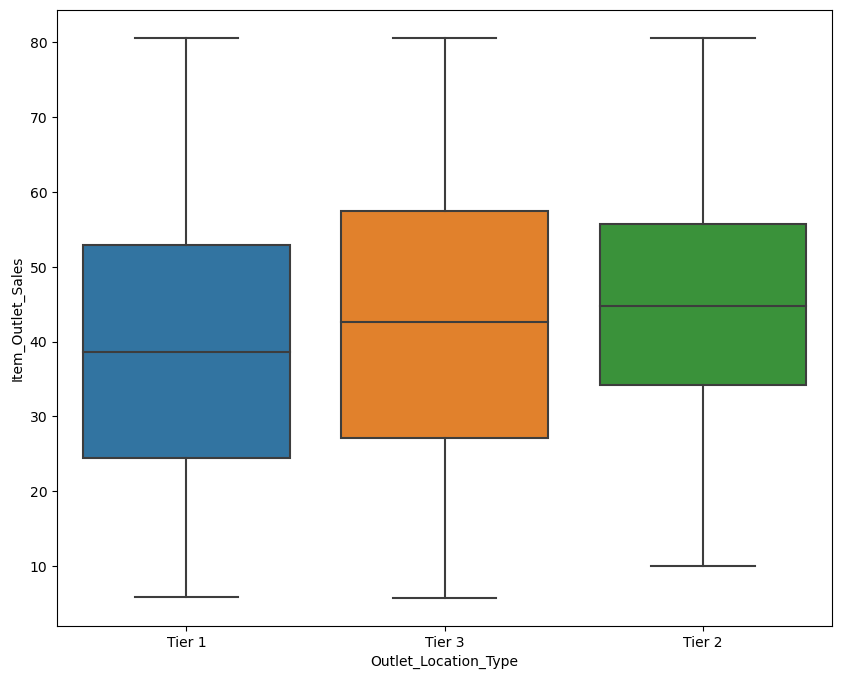

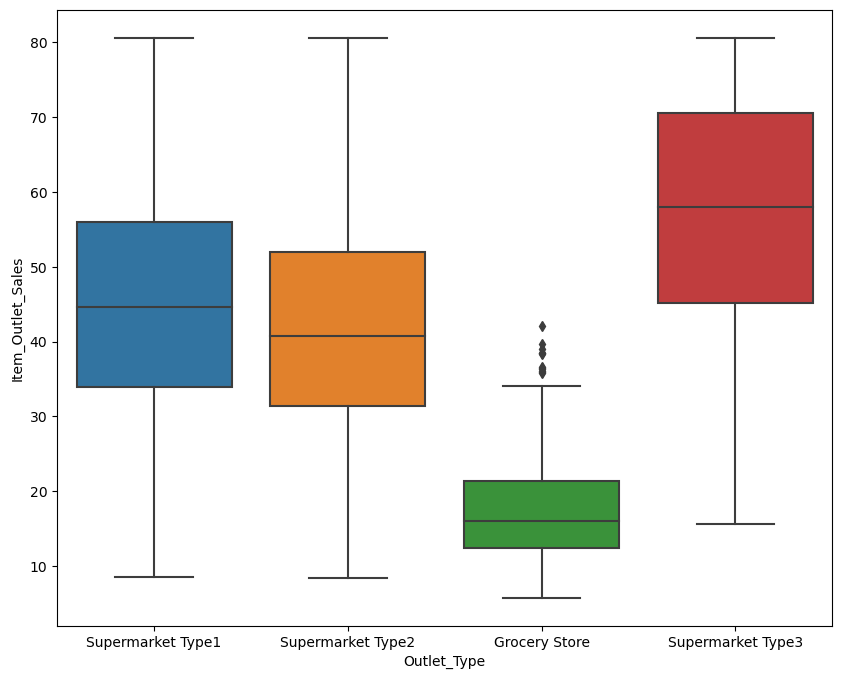

In [334]:
for i in categoric_train:
    plt.figure(figsize = (10,8))
    sns.boxplot( x = i, y = new_train['Item_Outlet_Sales'],data = new_train)
    #sns.boxplot( y = i, x = train3['Item_Outlet_Sales'],data = train3);

### Label Encoding

In [335]:
from sklearn.preprocessing import LabelEncoder

# Defining a function to apply label encoding to dataset
def label_encode_column(col):
    le = LabelEncoder()
    return le.fit_transform(col)

# Apply label encoding to all categorical columns
df_encoded = new_train.apply(lambda x: label_encode_column(x) if x.dtype == 'object' else x)

# Display the transformed dataset
df_encoded.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.126678          4   
1                8         5.92                 1         0.138846         14   
2              662        17.50                 0         0.129461         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          61.115775  
1                     2            2          21.057607  
2                     0            1          45.795961  
3                     2            0          27.062520  
4                     2            1          31.538947

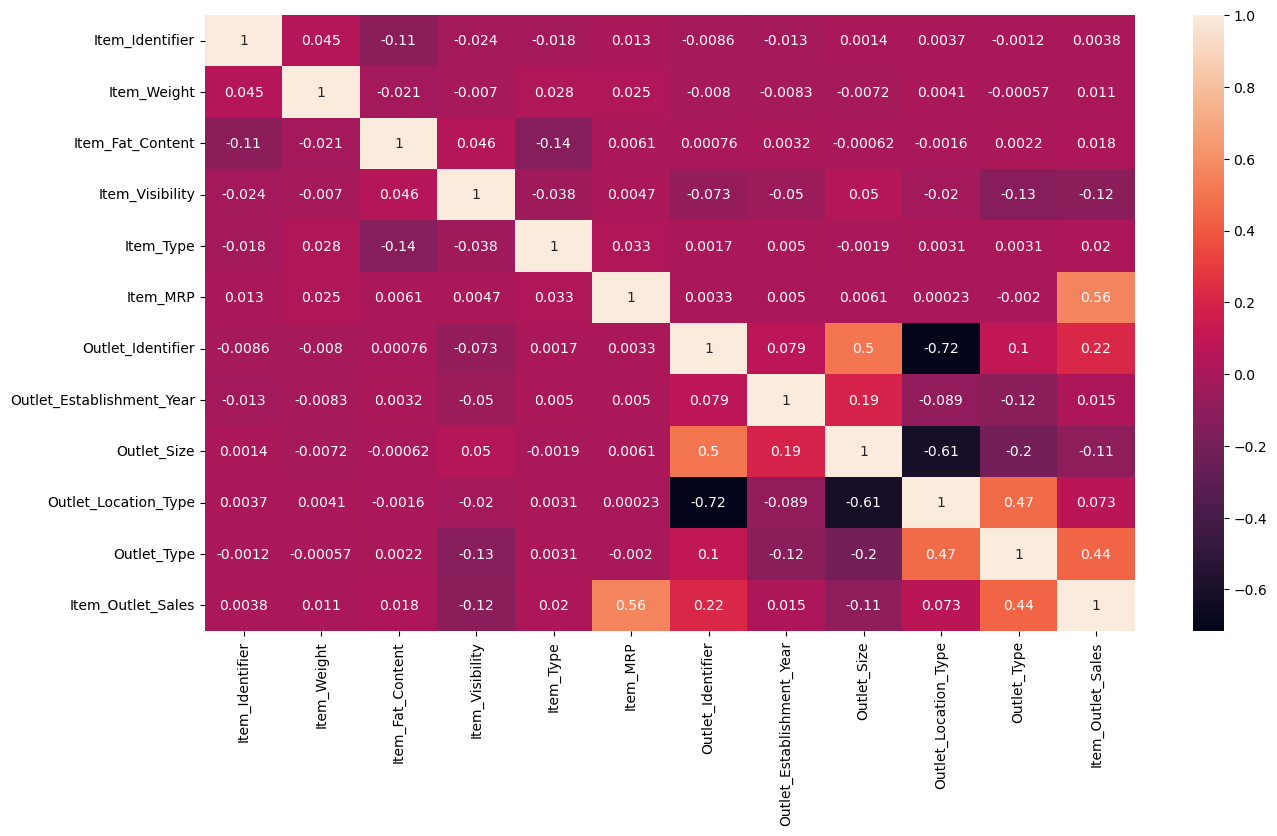

In [336]:
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

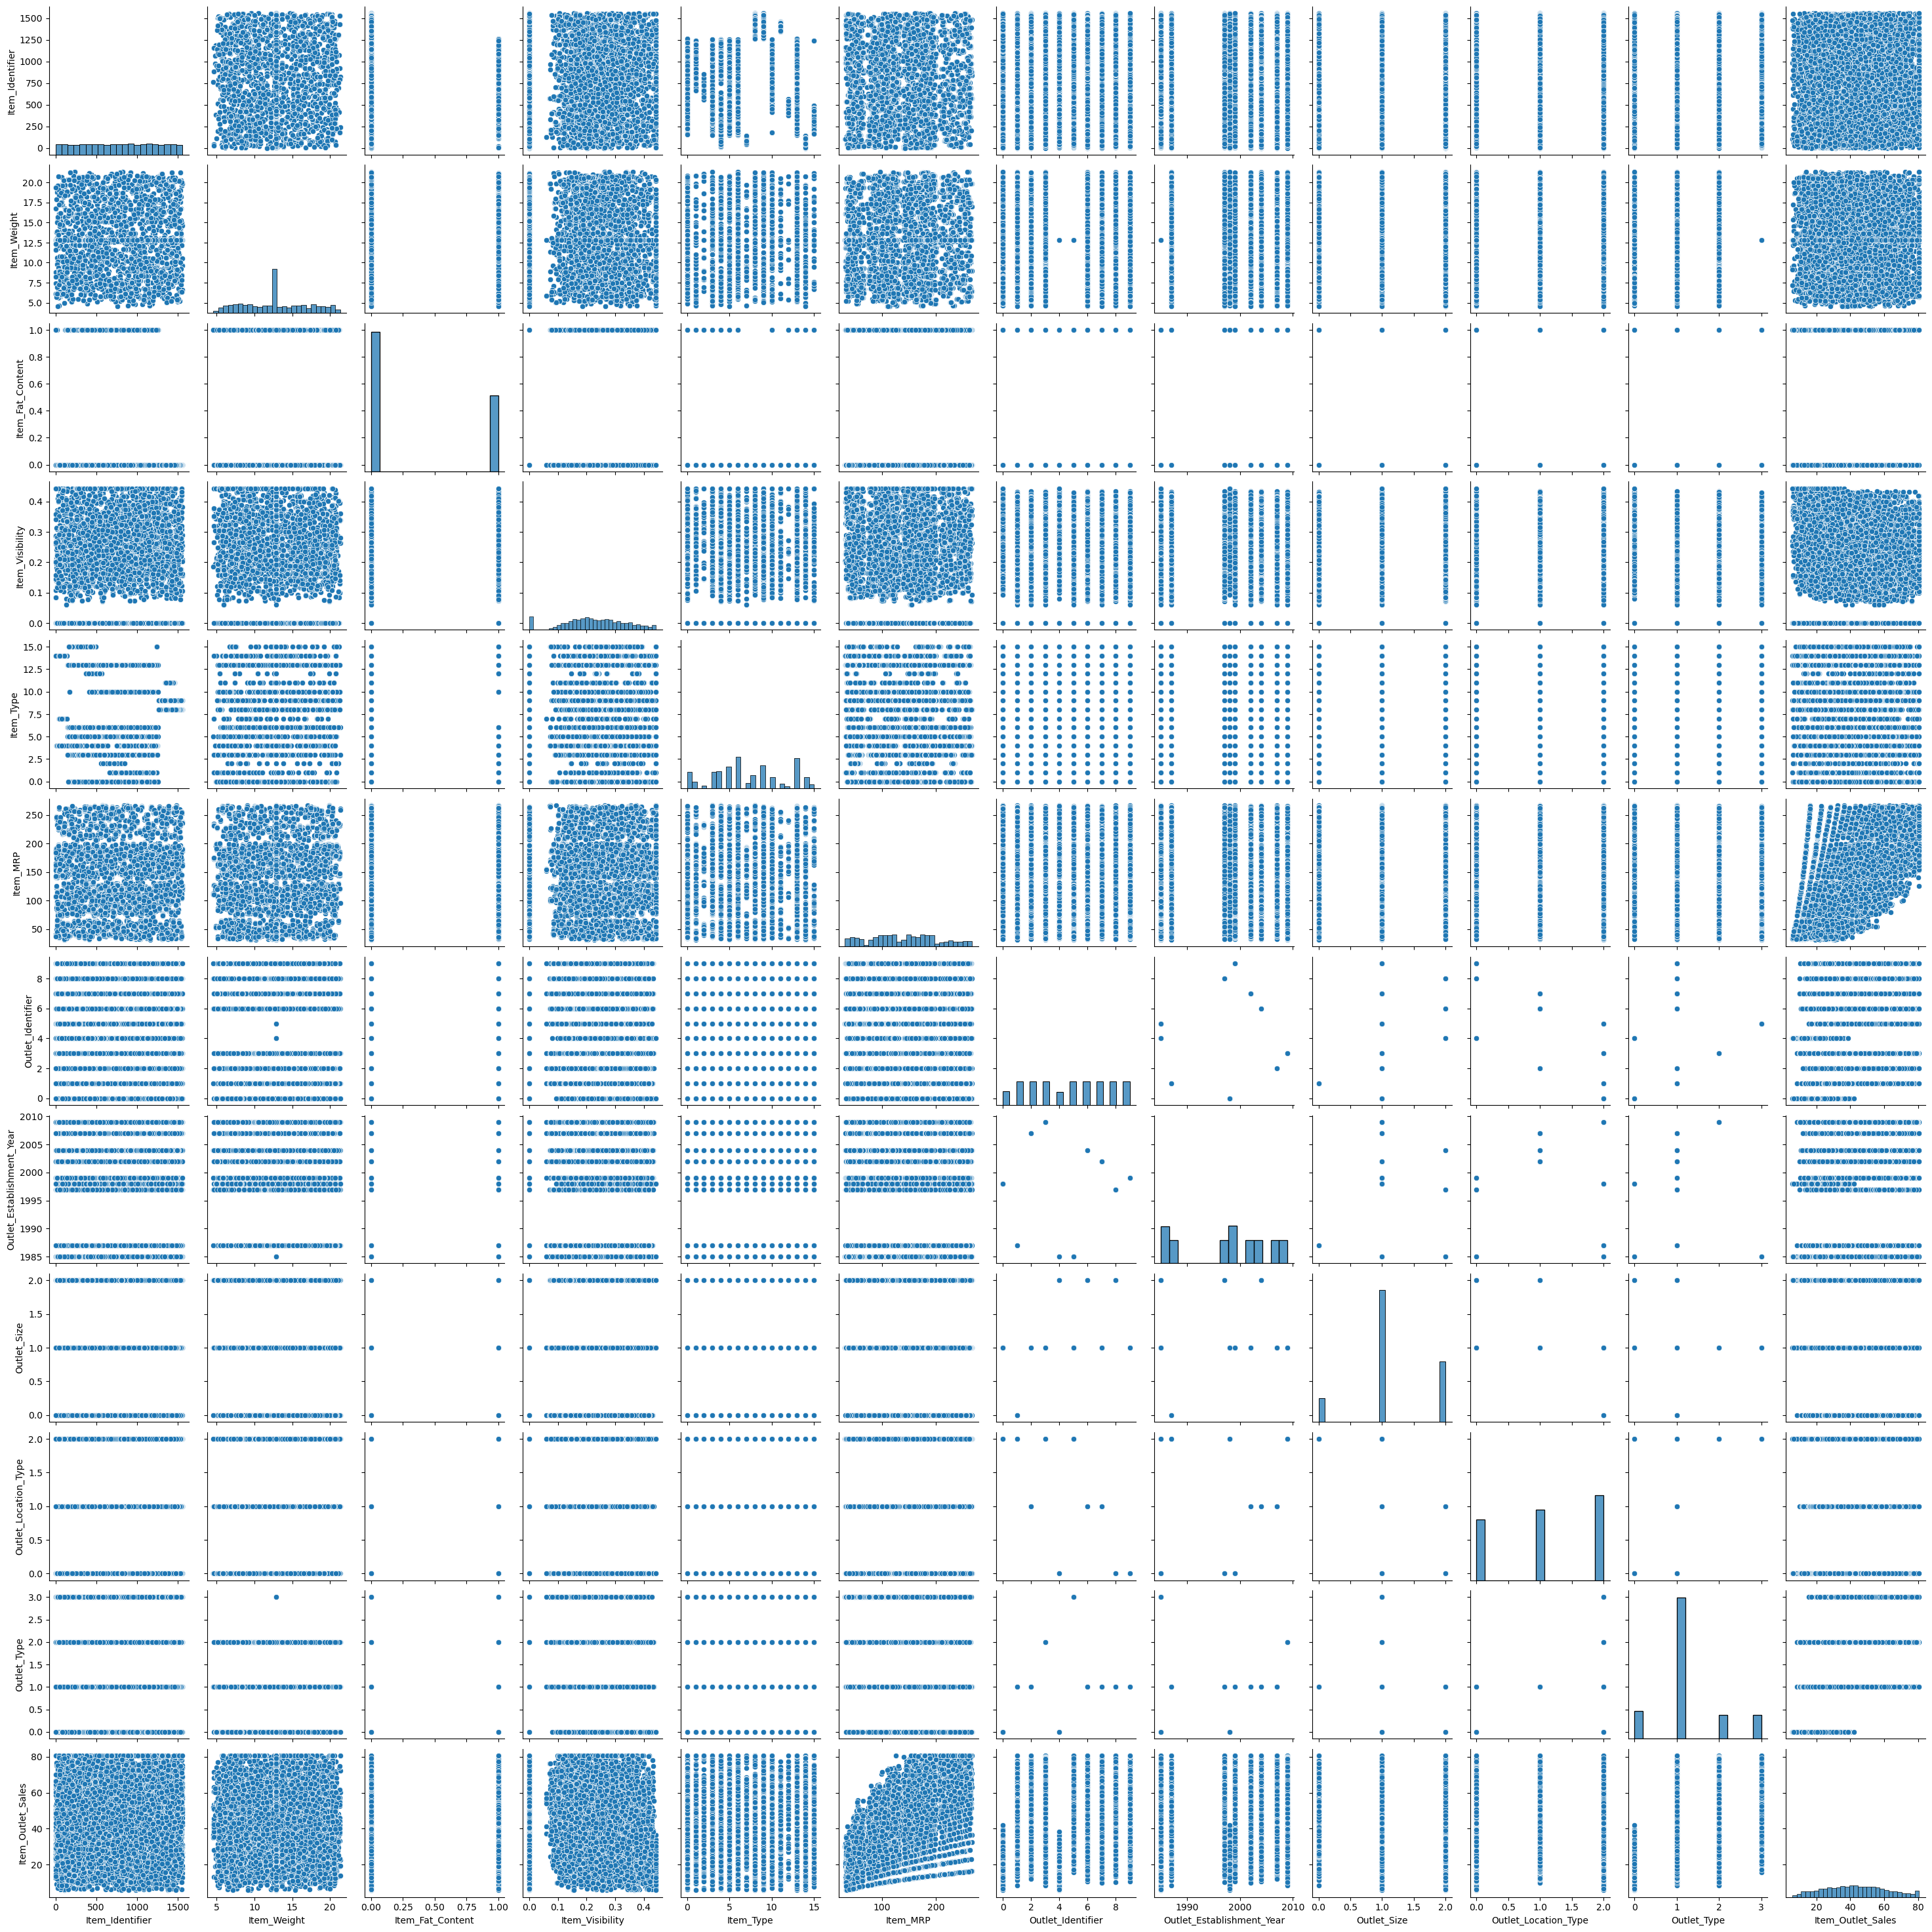

In [337]:
#pairplot for numerical variable
sns.pairplot(df_encoded)

## One Hot Encodeing

In [338]:
final_data = pd.get_dummies(new_train.drop('Item_Identifier',axis=1))
final_data.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.126678  249.8092                       1999   
1         5.92         0.138846   48.2692                       2009   
2        17.50         0.129461  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0          61.115775                         1                         0   
1          21.057607                         0                         1   
2          45.795961                         1                         0   
3          27.062520                         0                         1   
4          31.538947                         1                         0   

   Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  ...  \
0                       0                 0                    0  ...   
1                       0                 0                    0  ...   
2                       0                 0                    0  ...   
3                       0                 0                    0  ...   
4                       0                 0                    0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                 0                   1                  0   
1                 0                   1                  0   
2                 0                   1                  0   
3                 0                   1                  0   
4                 1                   0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 43 columns]

In [339]:
final_data.shape

(8523, 43)

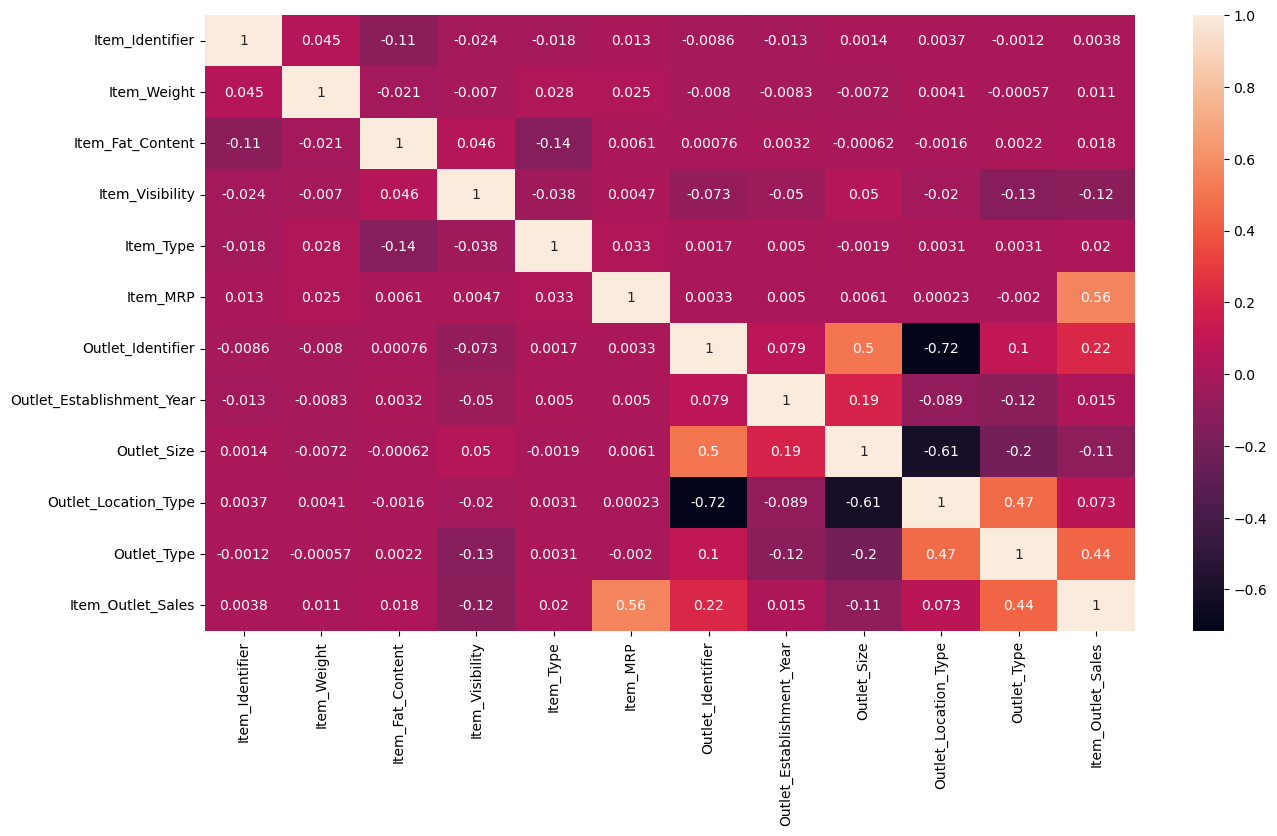

In [340]:
# Correlation of the numerical data with heatmap :


plt.figure(figsize=(15,8))

sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

### Selecting input features and target feature

In [341]:
#Input feature stores in x variable
x=final_data.drop('Item_Outlet_Sales',axis=1)
x.head(3)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.126678  249.8092                       1999   
1         5.92         0.138846   48.2692                       2009   
2        17.50         0.129461  141.6180                       1999   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                         1                         0                       0   
1                         0                         1                       0   
2                         1                         0                       0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0                 0                    0                 0  ...   
1                 0                    0                 0  ...   
2                 0                    0                 0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                 0                   1                  0   
1                 0                   1                  0   
2                 0                   1                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  

[3 rows x 42 columns]

In [342]:
#Target feature stores inn variable y
y=final_data['Item_Outlet_Sales']
y.head(3)

0    61.115775
1    21.057607
2    45.795961
Name: Item_Outlet_Sales, dtype: float64

In [343]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x = pd.DataFrame(data = x1, columns = x.columns)

### Train and Test Split

In [344]:
#Spliting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

#Dimentions of train and test data
print(x_train.shape)
print("-----------")
print(y_train.shape)
print("-----------")
print(x_test.shape)
print("-----------")
print(y_test.shape)

(6818, 42)
-----------
(6818,)
-----------
(1705, 42)
-----------
(1705,)


# Model Building 

### Multilinear Regession

In [345]:
model=LinearRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)

r2_MR = model.score(x_test, y_test)
print('R2 Score',r2_MR*100,"%")

print("Mean Squarred Error:", mean_squared_error(y_test,y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

MAE_MR=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : " + str(MAE_MR))

train_score_LR = lasso.score(x_train, y_train)
test_score_LR = lasso.score(x_test, y_test)
print("**************************************")

print("Training set score: {:.2f}".format(train_score_LR))
print("Test set score: {:.2f}".format(test_score_LR))

R2 Score 67.37596074761952 %
Mean Squarred Error: 103.8955103555956
RMSE: 10.192914713446571
Mean Absolute Error : 8.03197071278659
**************************************
Training set score: -18362.13
Test set score: -17615.11


<AxesSubplot:xlabel='Item_Outlet_Sales'>

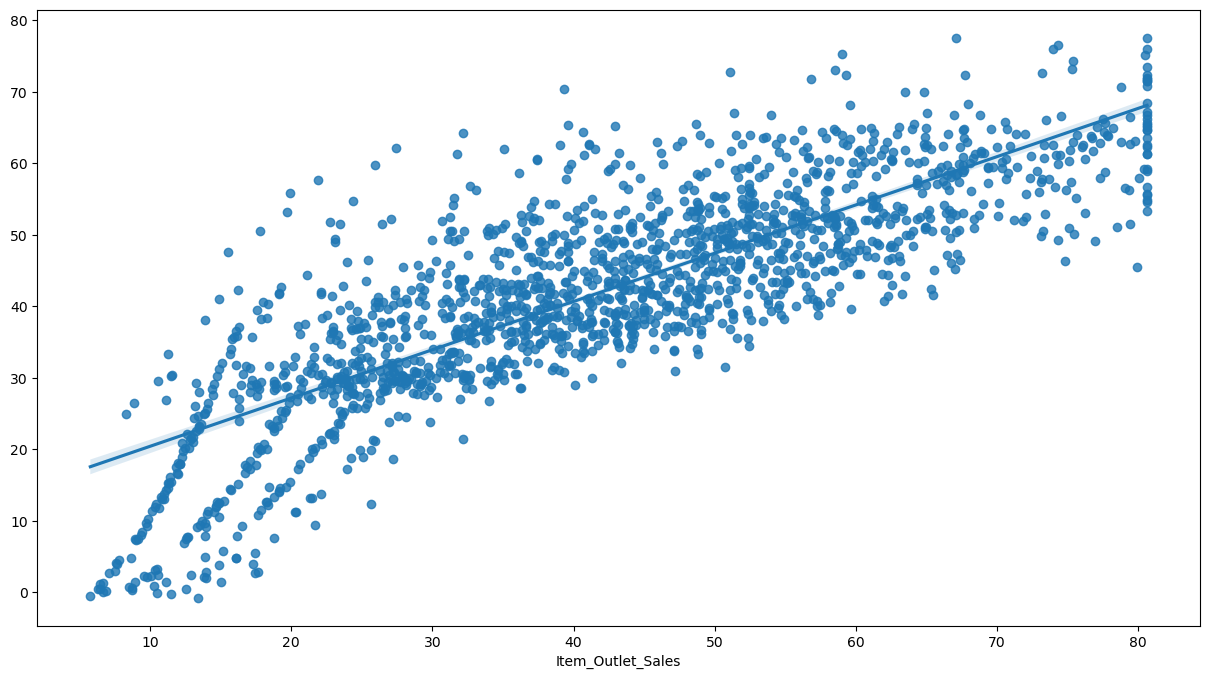

In [346]:
sns.regplot(y_test,y_pred)

### Lasso Regression

In [347]:
from sklearn.linear_model import Lasso, Ridge
# Train the Lasso regression model
lasso = Lasso(alpha=0.01,random_state=35) # you can play with the value of alpha to control the regularization strength
lasso.fit(x_train, y_train)
lasso.fit(x_test, y_test)

y_pred_L=lasso.predict(x_test)

r2_L = r2_score(y_pred_L, y_test)
print('R2 Score',r2_L*100,"%")


print("Mean Squarred Error:", mean_squared_error(y_test,y_pred_L))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_L)))

MAE_L=mean_absolute_error(y_test,y_pred_L)
print("Mean Absolute Error : " + str(MAE_L))

# Evaluate the model
train_score_L = lasso.score(x_train, y_train)
test_score_L = lasso.score(x_test, y_test)

print("Training set score: {:.2f}".format(train_score_L))
print("Test set score: {:.2f}".format(test_score_L))


R2 Score 53.13099076039889 %
Mean Squarred Error: 101.4367210599447
RMSE: 10.071579869114116
Mean Absolute Error : 7.936093379040261
Training set score: 0.65
Test set score: 0.68


### Ridge Regression

In [348]:
# Train the Ridge regression model
ridge = Ridge(alpha=0.01,random_state=42) # you can play with the value of alpha to control the regularization strength
ridge.fit(x_train, y_train)


y_pred_R=ridge.predict(x_test)

r2_R = r2_score(y_pred_R, y_test)
print('R2 Score',r2_R*100,"%")


print("Mean Squarred Error:", mean_squared_error(y_test,y_pred_R))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_R)))

MAE_R=mean_absolute_error(y_test,y_pred_R)
print("Mean Absolute Error : " + str(MAE_R))



# Evaluate the model
train_score_R = ridge.score(x_train, y_train)
test_score_R = ridge.score(x_test, y_test)

print("Training set score: {:.2f}".format(train_score_R))
print("Test set score: {:.2f}".format(test_score_R))

R2 Score 51.70365945245796 %
Mean Squarred Error: 103.91011346001089
RMSE: 10.193631024321554
Mean Absolute Error : 8.032925364193819
Training set score: 0.66
Test set score: 0.67


### Polynimial Regression

In [349]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
model.fit(x_poly, y_train)


y_pred_PR = model.predict(poly_reg.transform(x_test))
r2_PR = r2_score(y_test, y_pred_PR)
print("R2 score",r2_PR*100)

print("Mean Squarred Error:", mean_squared_error(y_test,y_pred_PR))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_PR)))

MAE_PR=mean_absolute_error(y_test,y_pred_PR)
print("Mean Absolute Error : " + str(MAE_PR))

# Evaluate the model
train_score_PR = ridge.score(x_train, y_train)
test_score_PR = ridge.score(x_test, y_test)

print("Training set score: {:.2f}".format(train_score_PR))
print("Test set score: {:.2f}".format(test_score_PR))



     

R2 score 68.59514984023227
Mean Squarred Error: 100.01284358901073
RMSE: 10.000642158832138
Mean Absolute Error : 7.735899422372004
Training set score: 0.66
Test set score: 0.67


<AxesSubplot:xlabel='Item_Outlet_Sales'>

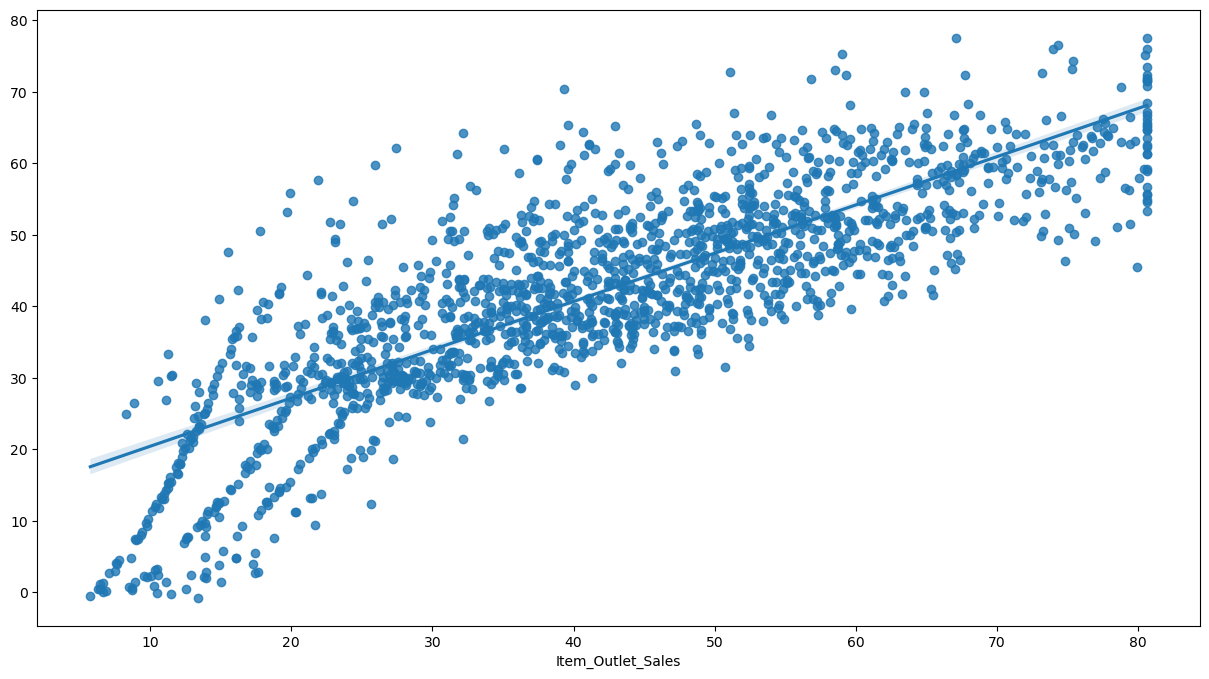

In [350]:
sns.regplot(y_test,y_pred)

### Random Forest Regression

R2 Score 68.02775401936168 %
Mean Squarred Error: 101.81978962432369
RMSE: 10.090579251178978
Mean Absolute Error : 7.756547833105249
Training set score: 0.76
Test set score: 0.68


<AxesSubplot:xlabel='Item_Outlet_Sales'>

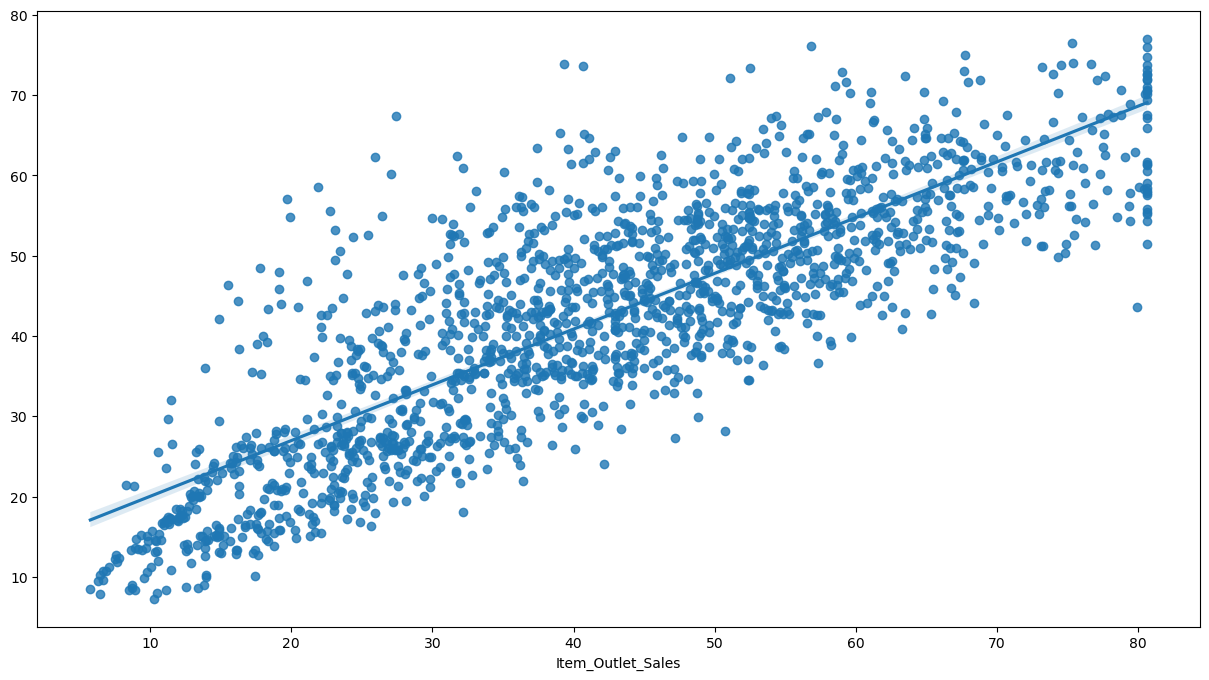

In [351]:
# Train the Random Forest regression model
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)
rf.fit(x_train, y_train)

y_pred_RF=rf.predict(x_test)
y_pred_RF#.reshape(-1,1)

r2_RF=r2_score(y_test,y_pred_RF)
print("R2 Score",score_RF*100,"%")

print("Mean Squarred Error:", mean_squared_error(y_test,y_pred_RF))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_RF)))

MAE_RF=mean_absolute_error(y_test,y_pred_RF)
print("Mean Absolute Error : " + str(MAE_RF))

train_score_RF = rf.score(x_train, y_train)
test_score_RF = rf.score(x_test, y_test)

print("Training set score: {:.2f}".format(train_score_RF))
print("Test set score: {:.2f}".format(test_score_RF))

sns.regplot(y_test,y_pred_RF)

In [352]:
print(y_pred_RF.shape)
print(y_test.shape)

(1705,)
(1705,)


### XGBoost regression

R2 Score: 68.88291481039161 %
Mean Squarred Error: 99.09641848892183
RMSE: 9.954718403296088
Mean Absolute Error : 7.679639486146253
Training set score: 0.73
Test set score: 0.69


<AxesSubplot:xlabel='Item_Outlet_Sales'>

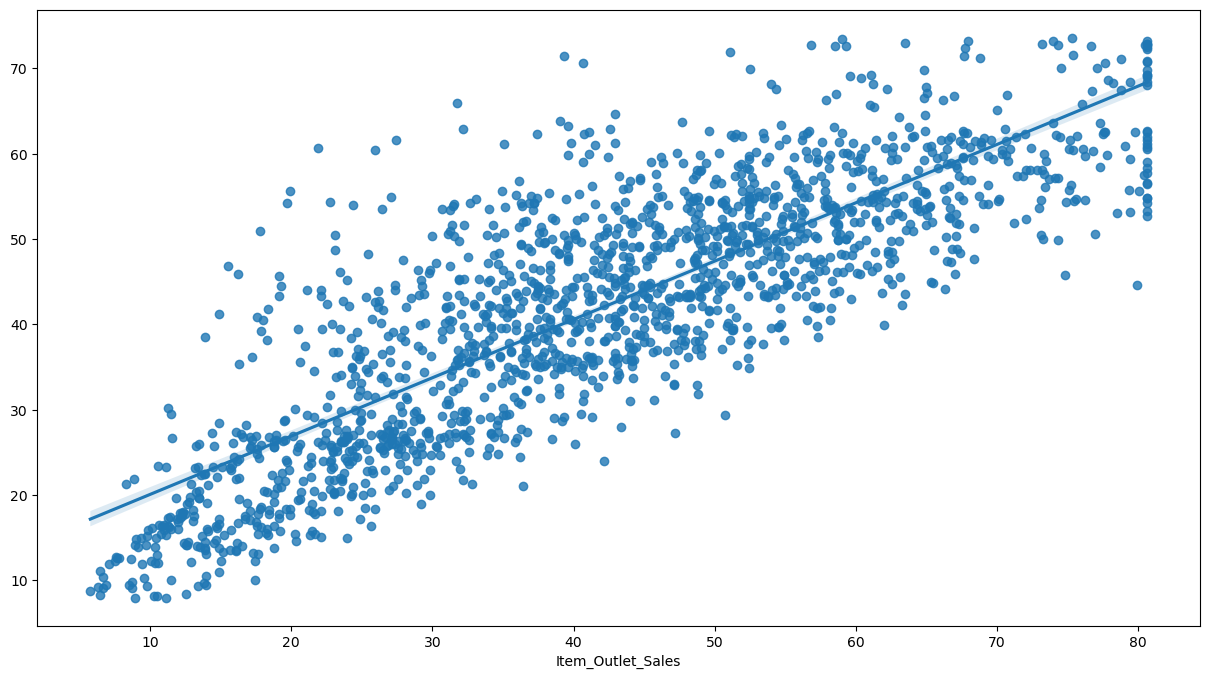

In [353]:

# Train the XGBoost regression model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=50, learning_rate=0.1, random_state=20)
xgb_model.fit(x_train, y_train)


y_pred_XG=xgb_model.predict(x_test)

r2_XG=r2_score(y_test, y_pred_XG)

print("R2 Score:", r2_XG*100,"%")
print("Mean Squarred Error:", mean_squared_error(y_test, y_pred_XG))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_XG)))

MAE_XG=mean_absolute_error(y_test,y_pred_XG)
print("Mean Absolute Error : " + str(MAE_XG))

# Evaluate the model
train_score_X = xgb_model.score(x_train, y_train)
test_score_X = xgb_model.score(x_test, y_test)

print("Training set score: {:.2f}".format(train_score_X))
print("Test set score: {:.2f}".format(test_score_X))



sns.regplot(y_test,y_pred_XG)

# Conclusion

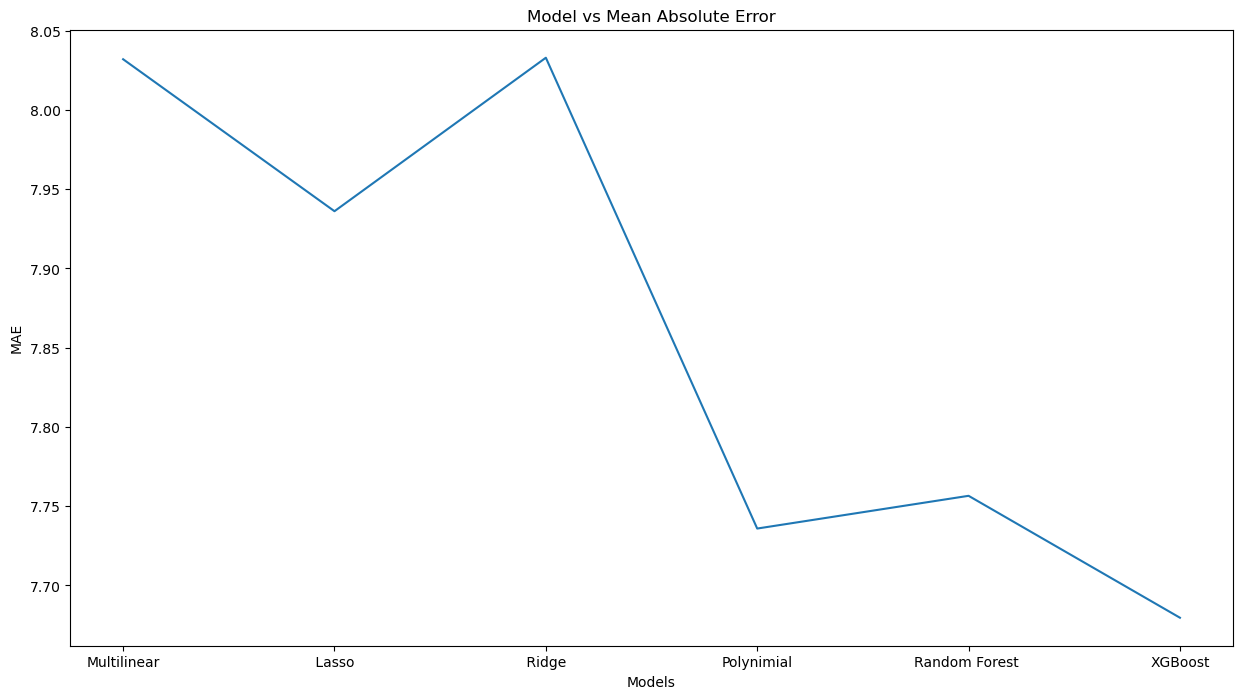

In [354]:
model=['Multilinear',' Lasso ',' Ridge ','Polynimial','Random Forest ','XGBoost']
score=[r2_MR*100,r2_L*100,r2_R*100,r2_PR*100,r2_RF*100,r2_XG*100]
MAE=[MAE_MR,MAE_L,MAE_R,MAE_PR,MAE_RF,MAE_XG]

data = {'x': model, 'y1': MAE,'y2': score}

# Create a lineplot with multiple lines for each category
sns.lineplot(x='x', y='y1', data=data)

# Add labels and title to the plot
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Model vs Mean Absolute Error')

# Show the plot
plt.show()

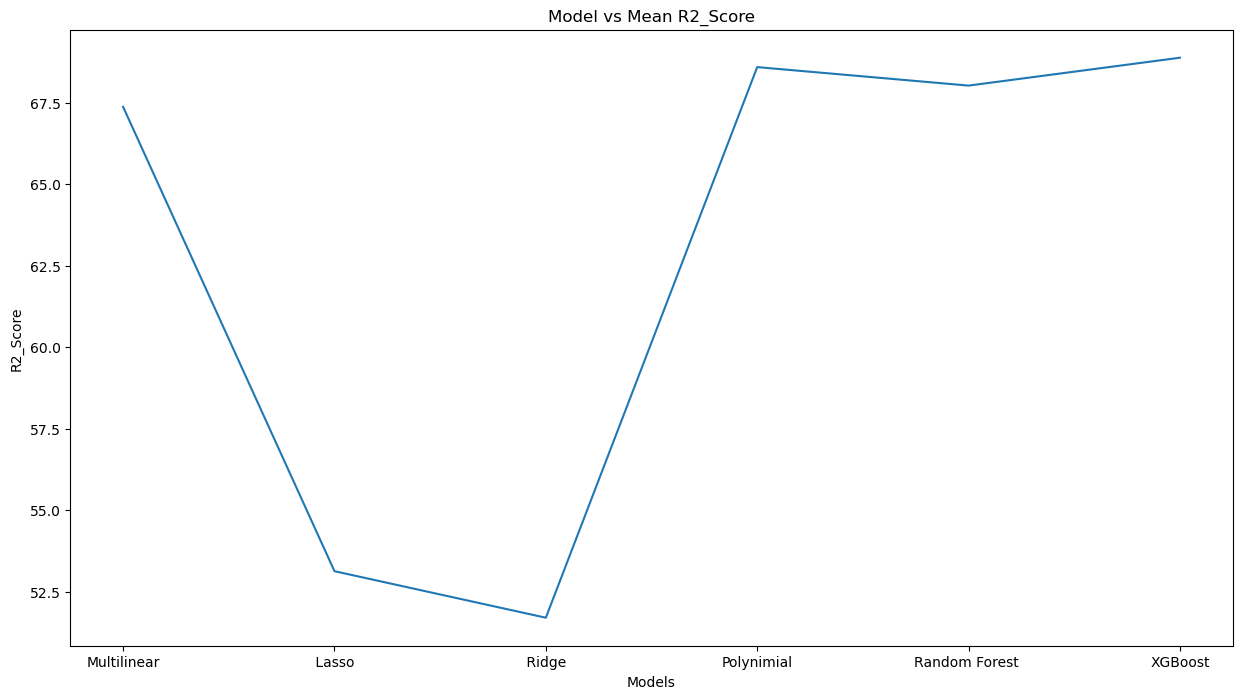

In [355]:
sns.lineplot(x='x', y='y2', data=data)

# Add labels and title to the plot
plt.xlabel('Models')
plt.ylabel('R2_Score')
plt.title('Model vs Mean R2_Score')

# Show the plot
plt.show()


After trying and testing multiple machine learning algorithms,we can conclude that XGBoost regression has given the highest r^2 score that is 68.88% and minimum mean absolute error that is 7.67.So that we choose XGBoost regression is final model to solve this problem.

